In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [3]:
df_financial = pd.read_excel("financial_data.xlsx",header=4)
df_financial = df_financial.loc[:, ~df_financial.columns.str.contains('^Unnamed')]
df_financial.head()

Products     Year     Net Sales  Advertising Spend (A)  Promotion Spend (P)
0  Brand 3  2017.01  3.324572e+06           141943.45955         70620.349235
1  Brand 1  2017.01  8.692541e+06           118484.23094        122556.189118
2  Brand 2  2017.01  7.409735e+06           158771.21121        134664.104787
3  Brand 3  2017.02  4.018024e+06           191409.99457        105655.592949
4  Brand 1  2017.02  8.248312e+06           347990.67781        160664.657435

In [4]:
df_financial.shape

(144, 5)

In [5]:
df_marketing = pd.read_excel("other_marketing_data.xlsx")
df_marketing.head()

BRAND       DATE  RATE OF INNOVATION  PRICE PER VOLUME         TDP  \
0  BRAND 1 2018-03-01            1.408282          8.317322  110.011542   
1  BRAND 1 2018-04-01            1.396744          8.908931  109.830905   
2  BRAND 1 2018-05-01            1.731032          9.249615  109.854779   
3  BRAND 1 2018-06-01            1.735802          9.064674  109.904309   
4  BRAND 1 2018-07-01            1.509909          9.176992  109.889601   

   SHARE OF VOICE  NET SALES OF COMPETITOR #1  NET SALES OF COMPETITOR #2  \
0          45.192                4.032382e+06                2.691472e+08   
1          63.484                5.264635e+06                3.269989e+08   
2          55.952                4.339679e+06                2.583341e+08   
3          32.280                4.651524e+06                2.546303e+08   
4          37.660                5.723941e+06                3.152492e+08   

   PRICE PER VOLUME COMPETITOR #1  MARKET SIZE - SUB MARKET 1  ...  \
0                       15.004156                4.390130e+06  ...   
1                       15.484910                5.774614e+06  ...   
2                       15.653820                4.933605e+06  ...   
3                       15.675915                4.559039e+06  ...   
4                       15.365394                5.336451e+06  ...   

   MARKET SIZE - SUB MARKET 12  MARKET SIZE - SUB MARKET 13  \
0                 3.606671e+07                 1.032834e+07   
1                 4.150016e+07                 1.300159e+07   
2                 3.093176e+07                 1.117407e+07   
3                 2.858196e+07                 9.730342e+06   
4                 3.608451e+07                 1.262302e+07   

   MARKET SIZE - SUB MARKET 14  MARKET SIZE - SUB MARKET 15  \
0                 3.296905e+07                 7.829776e+06   
1                 4.234487e+07                 9.093001e+06   
2                 3.410793e+07                 7.515288e+06   
3                 3.304539e+07                 7.200092e+06   
4                 4.301778e+07                 8.473812e+06   

   MARKET SIZE - SUB MARKET 16  POPULATION - 0 À 19 ANS  \
0                 7.848957e+06             1.445336e+07   
1                 1.124655e+07             1.445336e+07   
2                 9.221574e+06             1.445336e+07   
3                 8.915028e+06             1.445336e+07   
4                 9.464171e+06             1.445336e+07   

   POPULATION - 20 À 39 ANS  POPULATION - 40 À 59 ANS  \
0              1.700291e+07              1.534917e+07   
1              1.700291e+07              1.534917e+07   
2              1.700291e+07              1.534917e+07   
3              1.700291e+07              1.534917e+07   
4              1.700291e+07              1.534917e+07   

   POPULATION - 60 À 74 ANS  POPULATION - 75 ANS ET PLUS  
0                8230287.67                   4576453.04  
1                8230287.67                   4576453.04  
2                8230287.67                   4576453.04  
3                8230287.67                   4576453.04  
4                8230287.67                   4576453.04  

[5 rows x 30 columns]

In [6]:
df_marketing.shape

(102, 30)

## Data Manipulation

#### financial data

In [7]:
df_financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Products               144 non-null    object 
 1   Year                   144 non-null    float64
 2   Net Sales              144 non-null    float64
 3   Advertising Spend (A)  144 non-null    float64
 4   Promotion Spend (P)    144 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.8+ KB


In [8]:
def feature_to_str(x): 
    return str(x)

In [9]:
def toupper(x):
    return x.upper()

In [10]:
df_financial["Products"] = df_financial["Products"].apply(func=toupper)

In [11]:
df_financial["Year"] = df_financial["Year"].apply(func = feature_to_str)
df_financial["Year"] = pd.to_datetime(df_financial['Year'], format='%Y.%m').dt.strftime('%Y-%m')

In [12]:
df_financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Products               144 non-null    object 
 1   Year                   144 non-null    object 
 2   Net Sales              144 non-null    float64
 3   Advertising Spend (A)  144 non-null    float64
 4   Promotion Spend (P)    144 non-null    float64
dtypes: float64(3), object(2)
memory usage: 5.8+ KB


In [13]:
df_financial.describe()

Net Sales  Advertising Spend (A)  Promotion Spend (P)
count  1.440000e+02             144.000000           144.000000
mean   7.918691e+06          258773.972097        156688.317850
std    2.230753e+06          230842.447210         92682.291941
min    3.324572e+06            1718.963980         10181.573440
25%    6.662209e+06           79903.642453         84529.005400
50%    7.854102e+06          165590.064735        138973.831013
75%    8.942179e+06          363156.767725        208605.592386
max    1.598415e+07          991251.569140        467026.273962

#### marketing data

In [14]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BRAND                           102 non-null    object        
 1   DATE                            102 non-null    datetime64[ns]
 2   RATE OF INNOVATION              102 non-null    float64       
 3   PRICE PER VOLUME                102 non-null    float64       
 4   TDP                             102 non-null    float64       
 5   SHARE OF VOICE                  102 non-null    float64       
 6   NET SALES OF COMPETITOR #1      102 non-null    float64       
 7   NET SALES OF COMPETITOR #2      102 non-null    float64       
 8   PRICE PER VOLUME COMPETITOR #1  102 non-null    float64       
 9   MARKET SIZE - SUB MARKET 1      102 non-null    float64       
 10  MARKET SIZE - SUB MARKET 2      102 non-null    float64       
 11  MARKET

In [15]:
df_marketing["DATE"] = pd.to_datetime(df_marketing['DATE'], format='%Y-%m-%d').dt.strftime('%Y-%m')

In [16]:
df_marketing.head()

BRAND     DATE  RATE OF INNOVATION  PRICE PER VOLUME         TDP  \
0  BRAND 1  2018-03            1.408282          8.317322  110.011542   
1  BRAND 1  2018-04            1.396744          8.908931  109.830905   
2  BRAND 1  2018-05            1.731032          9.249615  109.854779   
3  BRAND 1  2018-06            1.735802          9.064674  109.904309   
4  BRAND 1  2018-07            1.509909          9.176992  109.889601   

   SHARE OF VOICE  NET SALES OF COMPETITOR #1  NET SALES OF COMPETITOR #2  \
0          45.192                4.032382e+06                2.691472e+08   
1          63.484                5.264635e+06                3.269989e+08   
2          55.952                4.339679e+06                2.583341e+08   
3          32.280                4.651524e+06                2.546303e+08   
4          37.660                5.723941e+06                3.152492e+08   

   PRICE PER VOLUME COMPETITOR #1  MARKET SIZE - SUB MARKET 1  ...  \
0                       15.004156                4.390130e+06  ...   
1                       15.484910                5.774614e+06  ...   
2                       15.653820                4.933605e+06  ...   
3                       15.675915                4.559039e+06  ...   
4                       15.365394                5.336451e+06  ...   

   MARKET SIZE - SUB MARKET 12  MARKET SIZE - SUB MARKET 13  \
0                 3.606671e+07                 1.032834e+07   
1                 4.150016e+07                 1.300159e+07   
2                 3.093176e+07                 1.117407e+07   
3                 2.858196e+07                 9.730342e+06   
4                 3.608451e+07                 1.262302e+07   

   MARKET SIZE - SUB MARKET 14  MARKET SIZE - SUB MARKET 15  \
0                 3.296905e+07                 7.829776e+06   
1                 4.234487e+07                 9.093001e+06   
2                 3.410793e+07                 7.515288e+06   
3                 3.304539e+07                 7.200092e+06   
4                 4.301778e+07                 8.473812e+06   

   MARKET SIZE - SUB MARKET 16  POPULATION - 0 À 19 ANS  \
0                 7.848957e+06             1.445336e+07   
1                 1.124655e+07             1.445336e+07   
2                 9.221574e+06             1.445336e+07   
3                 8.915028e+06             1.445336e+07   
4                 9.464171e+06             1.445336e+07   

   POPULATION - 20 À 39 ANS  POPULATION - 40 À 59 ANS  \
0              1.700291e+07              1.534917e+07   
1              1.700291e+07              1.534917e+07   
2              1.700291e+07              1.534917e+07   
3              1.700291e+07              1.534917e+07   
4              1.700291e+07              1.534917e+07   

   POPULATION - 60 À 74 ANS  POPULATION - 75 ANS ET PLUS  
0                8230287.67                   4576453.04  
1                8230287.67                   4576453.04  
2                8230287.67                   4576453.04  
3                8230287.67                   4576453.04  
4                8230287.67                   4576453.04  

[5 rows x 30 columns]

##### joined dataset

In [18]:
df =df_financial.merge(df_marketing,how="left",left_on =["Products","Year"],right_on=["BRAND","DATE"])
df=df.drop(["BRAND","DATE"],axis=1)
df=df.rename(columns={"Year":"DATE","Products":"BRAND"})

In [19]:
df.tail()

BRAND     DATE     Net Sales  Advertising Spend (A)  \
139  BRAND 1  2020-11  1.046033e+07           151828.07869   
140  BRAND 2  2020-11  7.873982e+06            61016.42804   
141  BRAND 3  2020-12  1.515350e+07           775757.98538   
142  BRAND 1  2020-12  9.421676e+06           267193.73001   
143  BRAND 2  2020-12  7.758742e+06            75432.83831   

     Promotion Spend (P)  RATE OF INNOVATION  PRICE PER VOLUME         TDP  \
139        108644.250080            1.624910          8.944994  110.231293   
140         43429.237920            1.338107         11.886408  109.474718   
141        326906.017440            2.586717         16.538848  108.027954   
142        440831.813342            1.258315          9.050724  110.191215   
143        153325.705760            1.132786         12.018071  109.422859   

     SHARE OF VOICE  NET SALES OF COMPETITOR #1  ...  \
139          53.800                5.949005e+06  ...   
140          71.016                2.248198e+07  ...   
141         175.388                1.446743e+06  ...   
142          38.736                6.098454e+06  ...   
143          52.724                1.728183e+07  ...   

     MARKET SIZE - SUB MARKET 12  MARKET SIZE - SUB MARKET 13  \
139                 5.465057e+07                 1.405592e+07   
140                 5.465057e+07                 1.405592e+07   
141                 4.619291e+07                 1.145902e+07   
142                 4.619291e+07                 1.145902e+07   
143                 4.619291e+07                 1.145902e+07   

     MARKET SIZE - SUB MARKET 14  MARKET SIZE - SUB MARKET 15  \
139                 4.683626e+07                 1.317823e+07   
140                 4.683626e+07                 1.317823e+07   
141                 3.808209e+07                 8.741425e+06   
142                 3.808209e+07                 8.741425e+06   
143                 3.808209e+07                 8.741425e+06   

     MARKET SIZE - SUB MARKET 16  POPULATION - 0 À 19 ANS  \
139                 1.224141e+07             1.435676e+07   
140                 1.224141e+07             1.435676e+07   
141                 1.331422e+07             1.435676e+07   
142                 1.331422e+07             1.435676e+07   
143                 1.331422e+07             1.435676e+07   

     POPULATION - 20 À 39 ANS  POPULATION - 40 À 59 ANS  \
139              1.693535e+07              1.522890e+07   
140              1.693535e+07              1.522890e+07   
141              1.693535e+07              1.522890e+07   
142              1.693535e+07              1.522890e+07   
143              1.693535e+07              1.522890e+07   

     POPULATION - 60 À 74 ANS  POPULATION - 75 ANS ET PLUS  
139               8551375.965                    4705049.5  
140               8551375.965                    4705049.5  
141               8551375.965                    4705049.5  
142               8551375.965                    4705049.5  
143               8551375.965                    4705049.5  

[5 rows x 33 columns]

Checking the number of NaN values in each columns

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BRAND                           144 non-null    object 
 1   DATE                            144 non-null    object 
 2   Net Sales                       144 non-null    float64
 3   Advertising Spend (A)           144 non-null    float64
 4   Promotion Spend (P)             144 non-null    float64
 5   RATE OF INNOVATION              99 non-null     float64
 6   PRICE PER VOLUME                99 non-null     float64
 7   TDP                             99 non-null     float64
 8   SHARE OF VOICE                  99 non-null     float64
 9   NET SALES OF COMPETITOR #1      99 non-null     float64
 10  NET SALES OF COMPETITOR #2      99 non-null     float64
 11  PRICE PER VOLUME COMPETITOR #1  99 non-null     float64
 12  MARKET SIZE - SUB MARKET 1      99 n

#### Spliting the data of each brand

In [58]:
df_brand1 = df.loc[df["BRAND"]=="BRAND 1"]
df_brand2 = df.loc[df["BRAND"]=="BRAND 2"]
df_brand3 = df.loc[df["BRAND"]=="BRAND 3"]

In [164]:
print("BRAND 1:",df_brand1.shape[0],"rows")
print("BRAND 2:",df_brand2.shape[0],"rows")
print("BRAND 3:",df_brand3.shape[0],"rows")

BRAND 1: 48 rows
BRAND 2: 48 rows
BRAND 3: 48 rows


In [77]:
def plot_netsales_a_p(my_df,brand):
    df_brand = my_df.loc[my_df["BRAND"]==brand]
    val2=[]
    for i in range(len(df_brand1)):
        val2.append((df_brand.iloc[i]["Advertising Spend (A)"],
                     df_brand.iloc[i]["Promotion Spend (P)"],
                     df_brand.iloc[i]["Net Sales"]))
    from mpl_toolkits.mplot3d import Axes3D
    from scipy.interpolate import griddata
    x, y, z = zip(*val2)
    z = list(map(float, z))
    grid_x, grid_y = np.mgrid[min(x):max(x):50j, min(y):max(y):50j]
    grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

    fig = plt.figure(figsize= (15, 10))
    ax = fig.gca(projection='3d')
    im=ax.plot_surface(grid_x, grid_y, grid_z, cmap=plt.cm.Spectral,alpha=0.6)
    ax.contour3D(grid_x, grid_y, grid_z, 50, cmap='binary')
    fig.colorbar(im)
    plt.title(brand)
    plt.show()

<ipython-input-77-26c912dc0961>:17: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  im=ax.plot_surface(grid_x, grid_y, grid_z, cmap=plt.cm.Spectral,alpha=0.6)


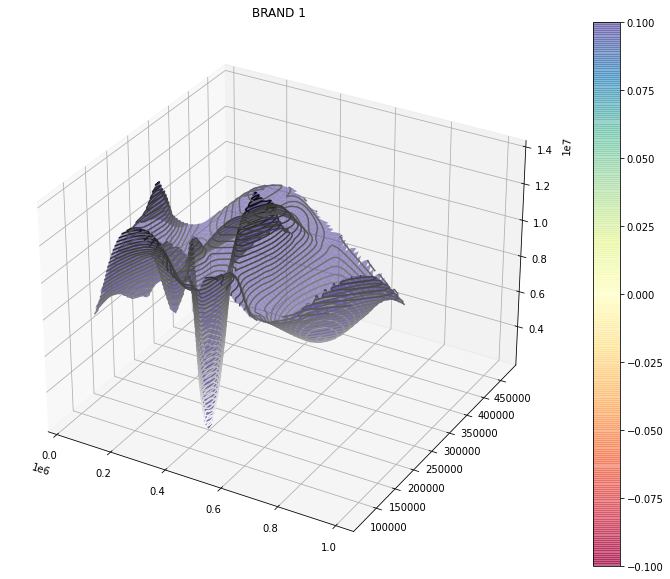

In [78]:
plot_netsales_a_p(df,"BRAND 1")

<ipython-input-77-26c912dc0961>:17: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  im=ax.plot_surface(grid_x, grid_y, grid_z, cmap=plt.cm.Spectral,alpha=0.6)


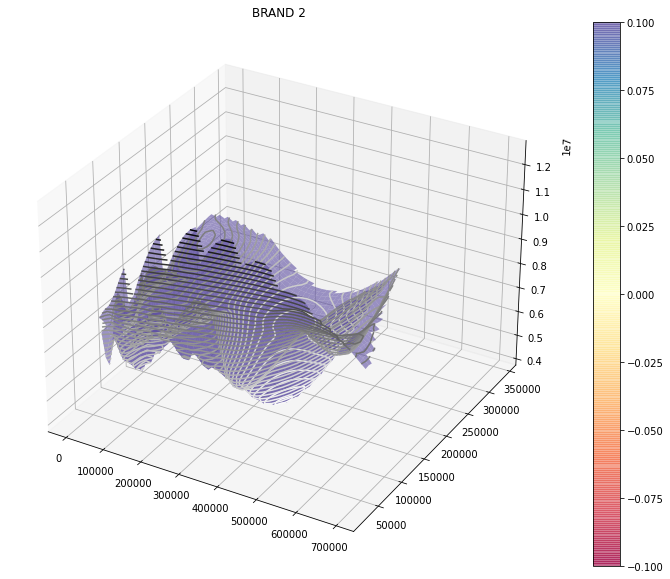

In [79]:
plot_netsales_a_p(df,"BRAND 2")

<ipython-input-77-26c912dc0961>:17: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  im=ax.plot_surface(grid_x, grid_y, grid_z, cmap=plt.cm.Spectral,alpha=0.6)


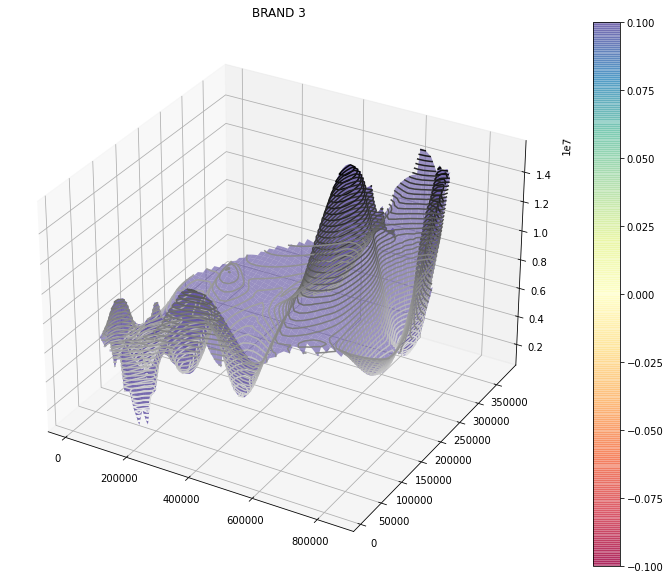

In [80]:
plot_netsales_a_p(df,"BRAND 3")

## Data Analysis

In [83]:
sns.set_style("darkgrid")

In [85]:
def plot_evolution(my_df,col):
    plt.figure(figsize=(15,10))
    sns.lineplot(x="DATE", y=col, data=my_df,hue="BRAND")
    plt.xticks(rotation=90)
    plt.title('evolutoion of '+col)
    plt.show()

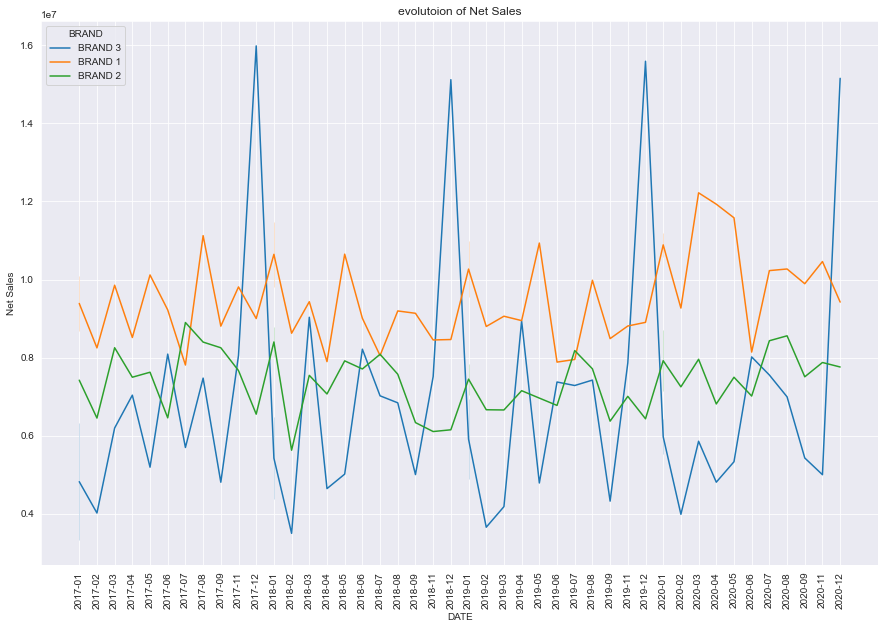

In [86]:
plot_evolution(df,"Net Sales")

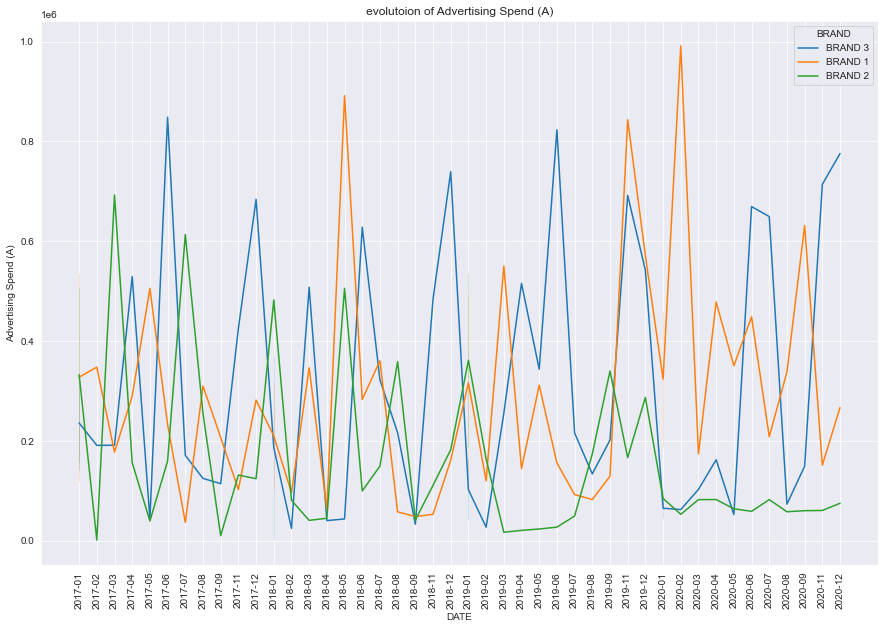

In [87]:
plot_evolution(df,"Advertising Spend (A)")

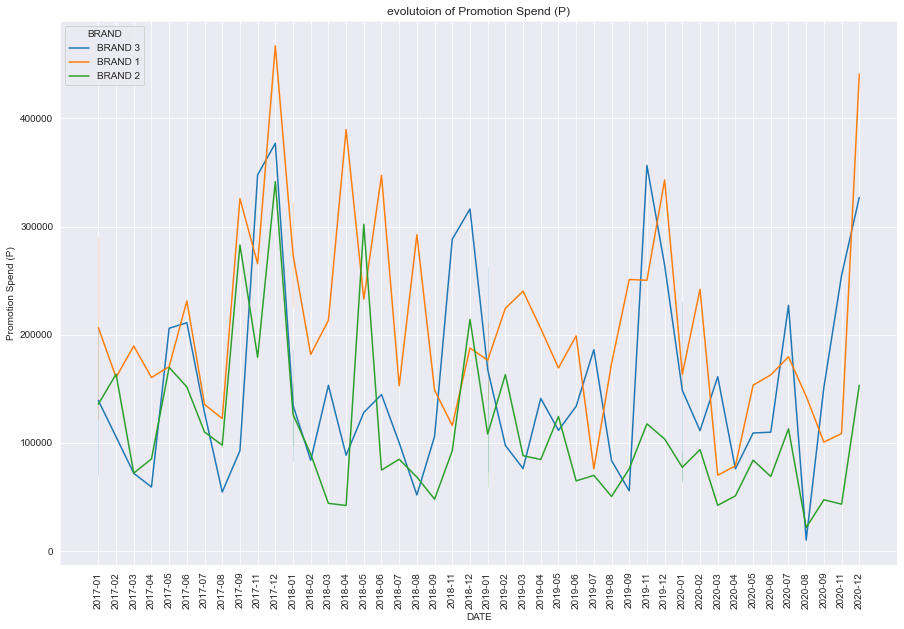

In [88]:
plot_evolution(df,"Promotion Spend (P)")

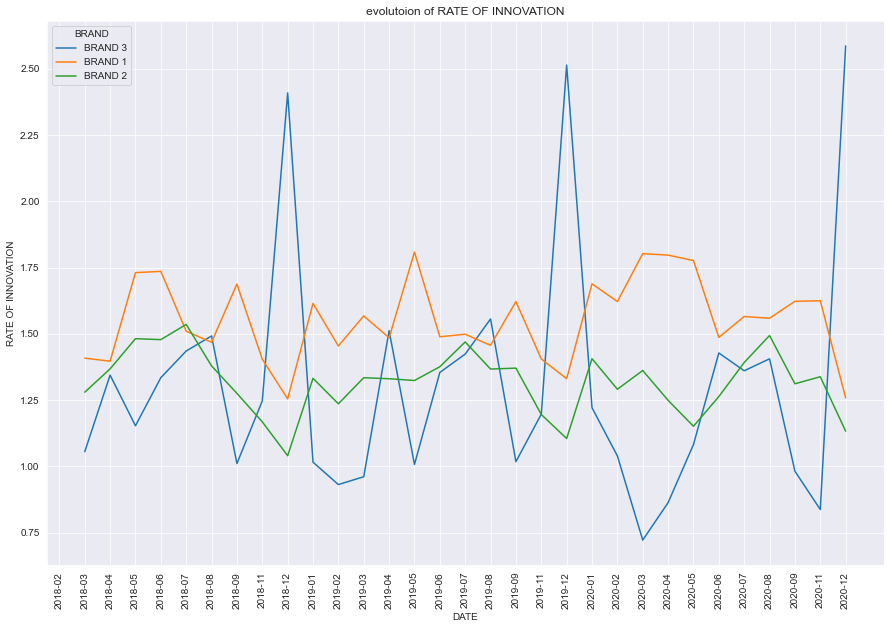

In [89]:
plot_evolution(df,"RATE OF INNOVATION")

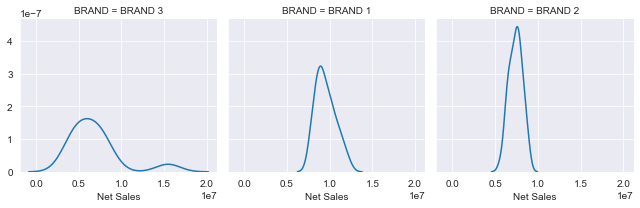

In [90]:
g = sns.FacetGrid(df, col="BRAND")
g.map(sns.kdeplot,"Net Sales")

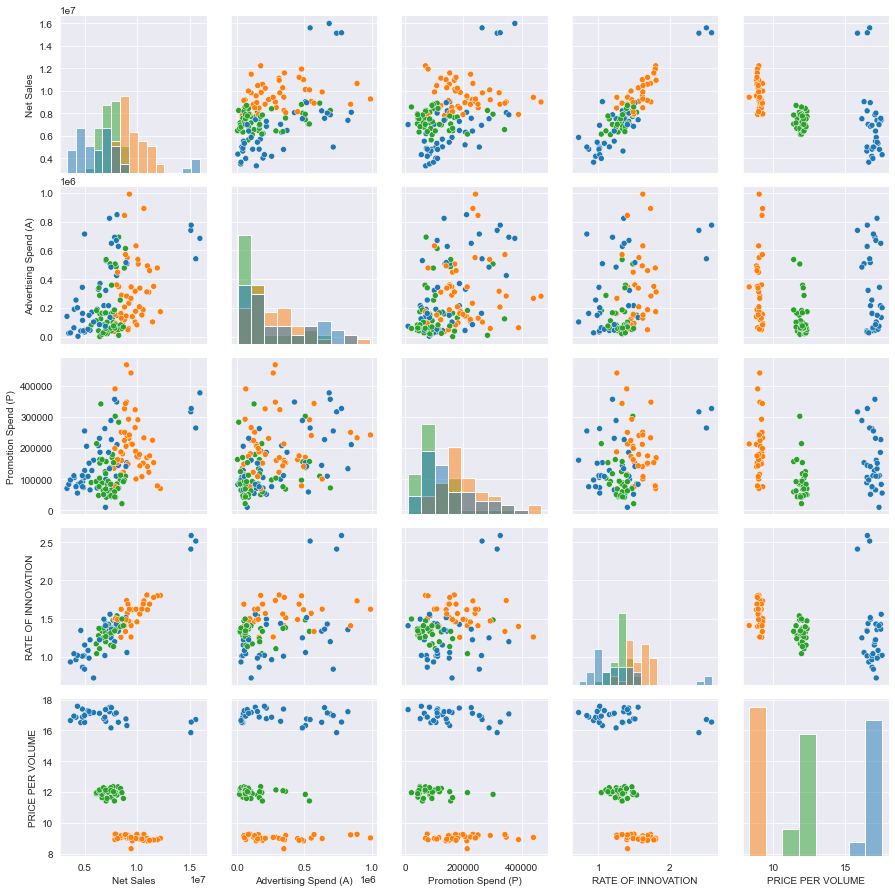

In [91]:
g = sns.PairGrid(df,hue="BRAND",vars=["Net Sales","Advertising Spend (A)","Promotion Spend (P)","RATE OF INNOVATION","PRICE PER VOLUME"])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

## Feature selection

#### Correaltion Matrix

In [97]:
def plot_corr_matrix(df_brand,brand):
    fig, ax = plt.subplots(figsize=(20,10))
    corrMatrix = df_brand.corr()
    sns.heatmap(corrMatrix, annot=True)
    plt.title(brand)
    plt.show()

#### BRAND 1

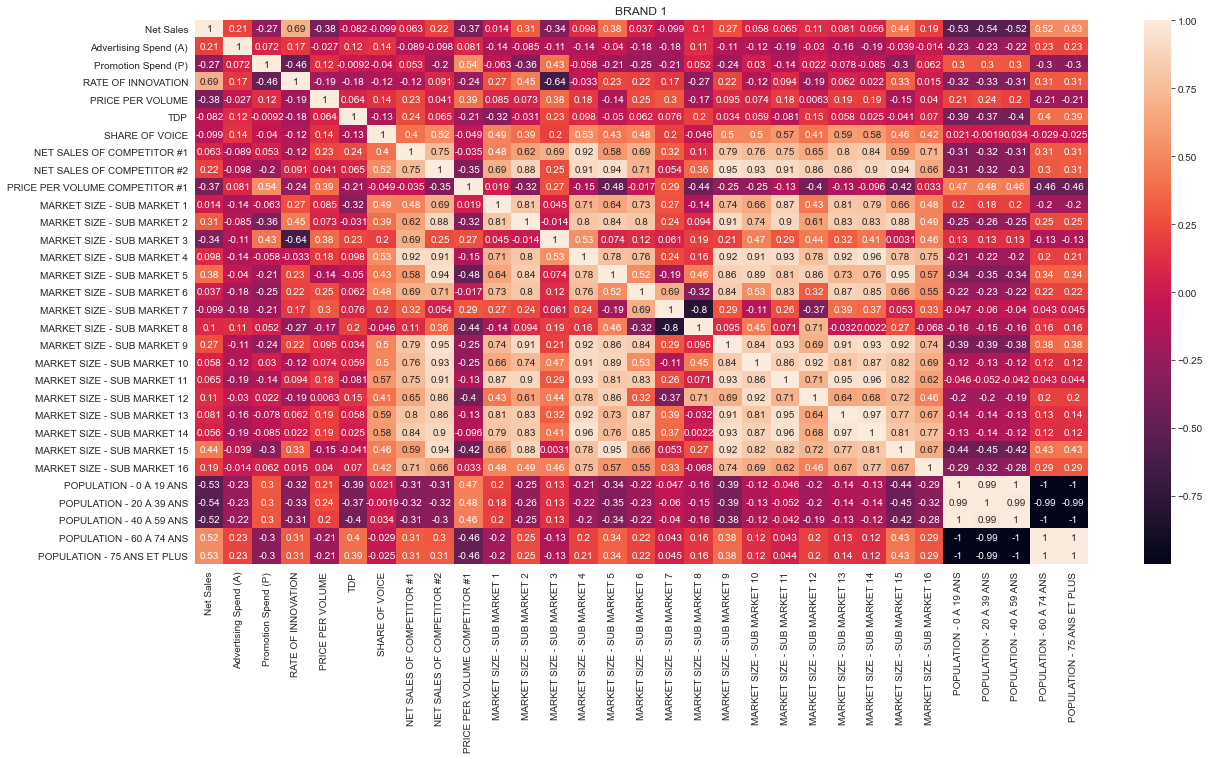

In [98]:
plot_corr_matrix(df_brand1,"BRAND 1")

#### BRAND 2

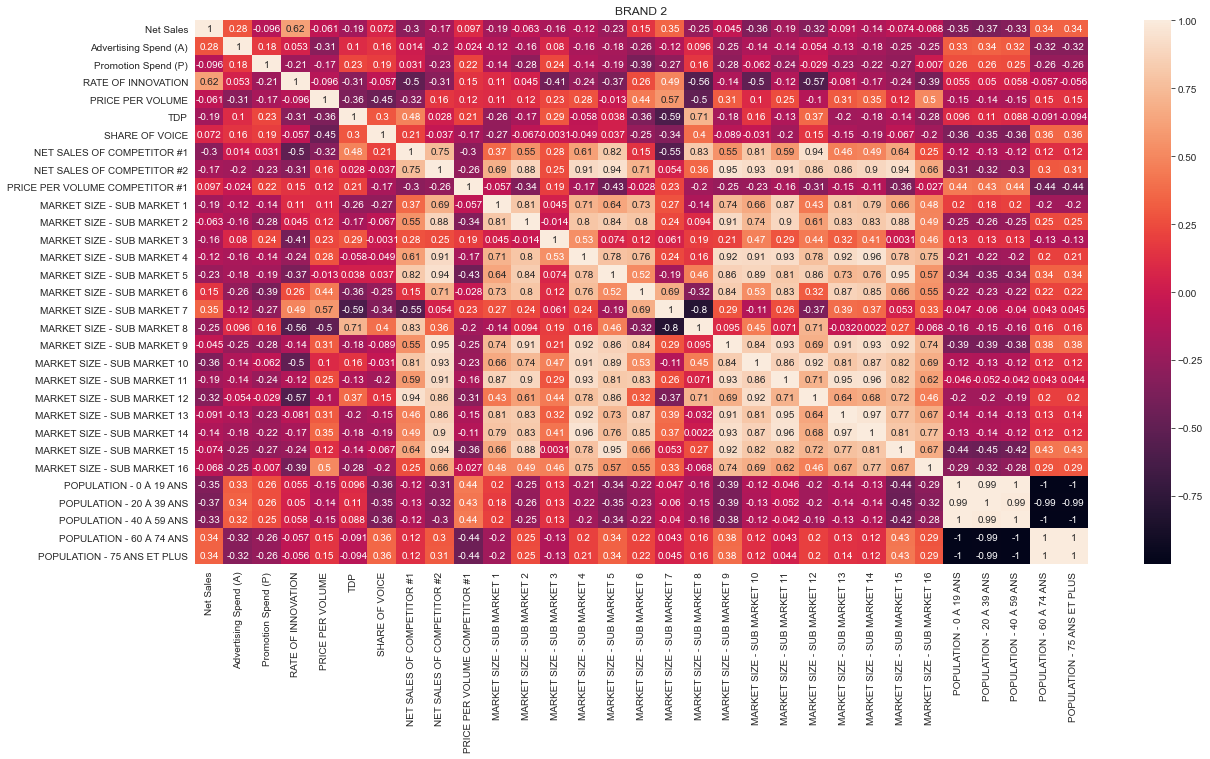

In [99]:
plot_corr_matrix(df_brand2,"BRAND 2")

#### BRAND 3

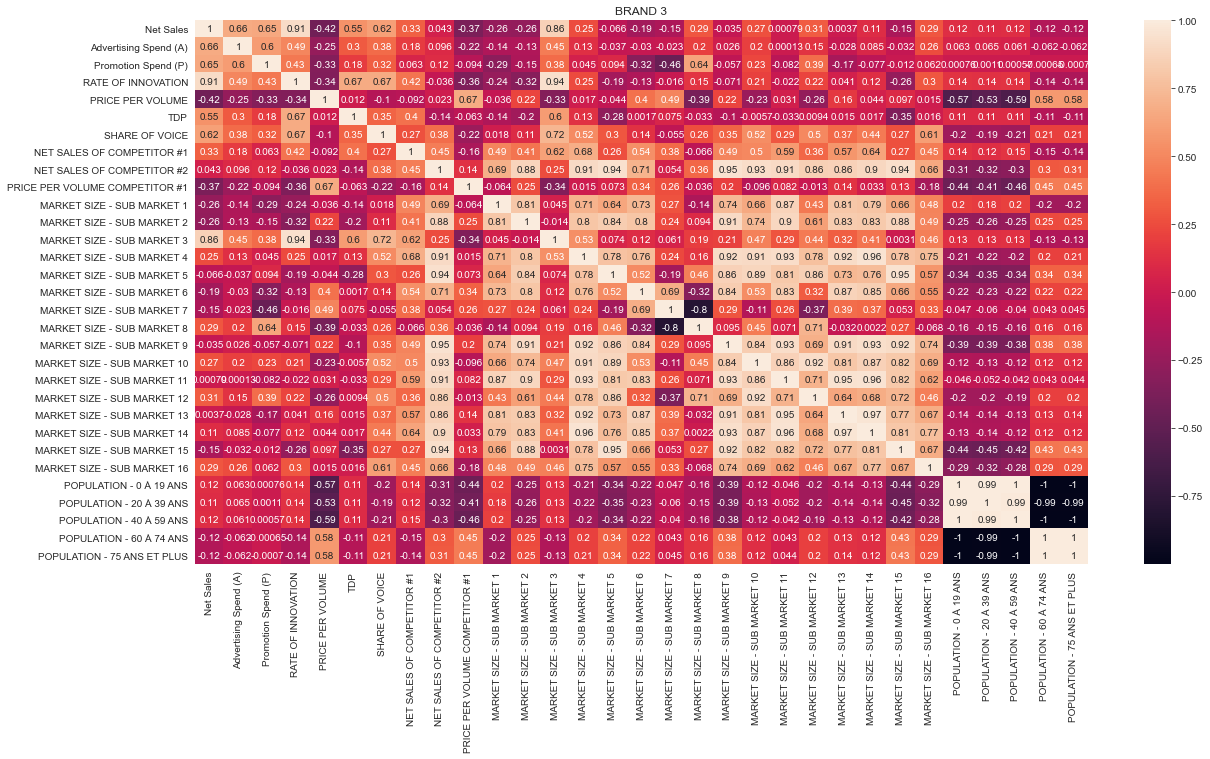

In [100]:
plot_corr_matrix(df_brand3,"BRAND 3")

In [102]:
feature_to_drop = ["POPULATION - 0 À 19 ANS","POPULATION - 40 À 59 ANS","POPULATION - 60 À 74 ANS",
                   "POPULATION - 75 ANS ET PLUS","MARKET SIZE - SUB MARKET 2","MARKET SIZE - SUB MARKET 4",
                  "MARKET SIZE - SUB MARKET 5","MARKET SIZE - SUB MARKET 6","MARKET SIZE - SUB MARKET 9",
                   "MARKET SIZE - SUB MARKET 10","MARKET SIZE - SUB MARKET 11","MARKET SIZE - SUB MARKET 13",
                   "MARKET SIZE - SUB MARKET 14","MARKET SIZE - SUB MARKET 15",
                   "MARKET SIZE - SUB MARKET 8",
                  ]

In [105]:
def split_label_features(df_brand,columns_to_drop):
    X_df_brand = df_brand.drop(labels=["Net Sales"]+columns_to_drop,axis=1)
    y_brand = df_brand["Net Sales"]
    return X_df_brand,y_brand

In [110]:
X_brand1,y_brand1 = split_label_features(df_brand1,feature_to_drop)
X_brand2,y_brand2 = split_label_features(df_brand2,feature_to_drop)
X_brand3,y_brand3 = split_label_features(df_brand3,feature_to_drop)

In [119]:
features = [col for col in X_brand1.columns if col!="Net Sales" and col!="DATE" and col!="BRAND"]

#### Random forest model to observe features importance

In [120]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'median')),
    ('scaler', StandardScaler())])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features),])

brand 1

In [121]:
reg_brand1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor())])
reg_brand1.fit(X_brand1, y_brand1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Advertising Spend (A)',
                                                   'Promotion Spend (P)',
                                                   'RATE OF INNOVATION',
                                                   'PRICE PER VOLUME', 'TDP',
                                                   'SHARE OF VOICE',
                                                   'NET SALES OF COMPETITOR #1',
                                                   'NET SALES OF COMPETITOR #2',
                                 

brand2

In [122]:
reg_brand2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor())])
reg_brand2.fit(X_brand2, y_brand2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Advertising Spend (A)',
                                                   'Promotion Spend (P)',
                                                   'RATE OF INNOVATION',
                                                   'PRICE PER VOLUME', 'TDP',
                                                   'SHARE OF VOICE',
                                                   'NET SALES OF COMPETITOR #1',
                                                   'NET SALES OF COMPETITOR #2',
                                 

Brand 3

In [123]:
reg_brand3 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor())])
reg_brand3.fit(X_brand3, y_brand3)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Advertising Spend (A)',
                                                   'Promotion Spend (P)',
                                                   'RATE OF INNOVATION',
                                                   'PRICE PER VOLUME', 'TDP',
                                                   'SHARE OF VOICE',
                                                   'NET SALES OF COMPETITOR #1',
                                                   'NET SALES OF COMPETITOR #2',
                                 

#### Feature importances

brand 1

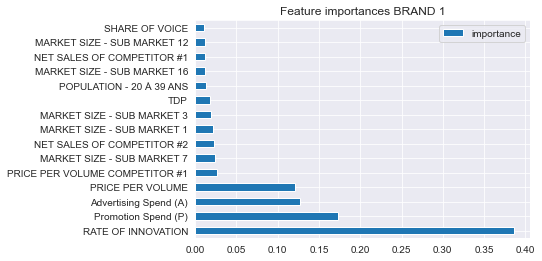

In [127]:
importance =  reg_brand1.get_params()['regressor'].feature_importances_
df_importance = pd.DataFrame({'importance':importance}, index = features)
df_importance = df_importance.sort_values('importance',ascending=False)
df_importance.iloc[:20].plot(kind = "barh")
plt.title("Feature importances BRAND 1")
plt.show()

In [128]:
df_importance.iloc[:5]

importance
RATE OF INNOVATION                0.386156
Promotion Spend (P)               0.172866
Advertising Spend (A)             0.127070
PRICE PER VOLUME                  0.121126
PRICE PER VOLUME COMPETITOR #1    0.026093

Brand 2

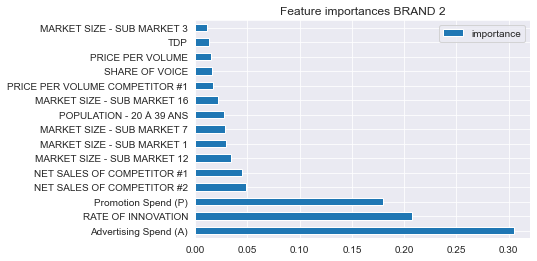

In [130]:
importance =  reg_brand2.get_params()['regressor'].feature_importances_
df_importance = pd.DataFrame({'importance':importance}, index = features)
df_importance = df_importance.sort_values('importance',ascending=False)
df_importance.iloc[:20].plot(kind = "barh")
plt.title("Feature importances BRAND 2")
plt.show()

In [131]:
df_importance.iloc[:5]

importance
Advertising Spend (A)         0.305056
RATE OF INNOVATION            0.207085
Promotion Spend (P)           0.179635
NET SALES OF COMPETITOR #2    0.048857
NET SALES OF COMPETITOR #1    0.044689

Brand 3

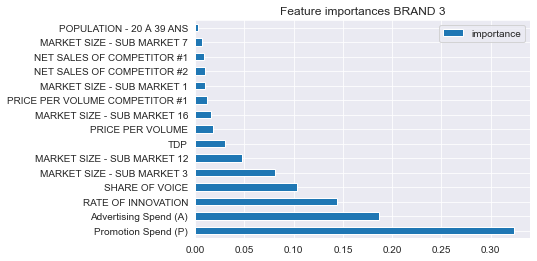

In [132]:
importance =  reg_brand3.get_params()['regressor'].feature_importances_
df_importance = pd.DataFrame({'importance':importance}, index = features)
df_importance = df_importance.sort_values('importance',ascending=False)
df_importance.iloc[:20].plot(kind = "barh")
plt.title("Feature importances BRAND 3")
plt.show()

In [133]:
df_importance.iloc[:5]

importance
Promotion Spend (P)           0.323590
Advertising Spend (A)         0.186369
RATE OF INNOVATION            0.144461
SHARE OF VOICE                0.103233
MARKET SIZE - SUB MARKET 3    0.080702

#### Linear regressor to observe the features impact

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.pipeline import make_pipeline

Brand 1

<AxesSubplot:>

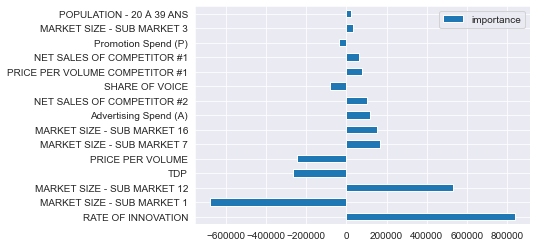

In [135]:
model = make_pipeline(
    preprocessor,
    linear_model.LinearRegression()
)
model.fit(X_brand1, y_brand1)
coefs = model[1].coef_
df_importance = pd.DataFrame({'importance':coefs,'abs_importance':abs(coefs)},index = features)
df_importance = df_importance.sort_values('abs_importance',ascending=False)
df_importance.iloc[:20].plot(kind = "barh",y = 'importance')

Brand 2

<AxesSubplot:>

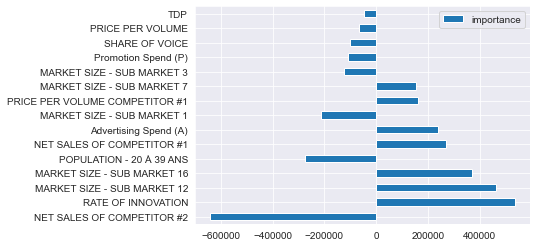

In [136]:
model = make_pipeline(
    preprocessor,
    linear_model.LinearRegression()
)
model.fit(X_brand2, y_brand2)
coefs = model[1].coef_
df_importance = pd.DataFrame({'importance':coefs,'abs_importance':abs(coefs)},index = features)
df_importance = df_importance.sort_values('abs_importance',ascending=False)
df_importance.iloc[:20].plot(kind = "barh",y = 'importance')

Brand 3

<AxesSubplot:>

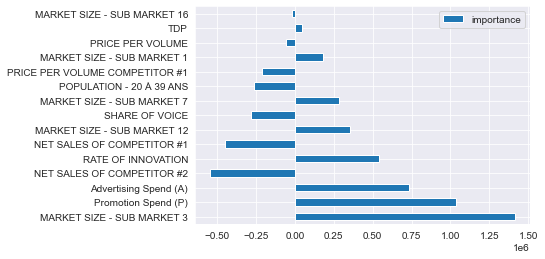

In [137]:
model = make_pipeline(
    preprocessor,
    linear_model.LinearRegression()
)
model.fit(X_brand3, y_brand3)
coefs = model[1].coef_
df_importance = pd.DataFrame({'importance':coefs,'abs_importance':abs(coefs)},index = features)
df_importance = df_importance.sort_values('abs_importance',ascending=False)
df_importance.iloc[:20].plot(kind = "barh",y = 'importance')

In [140]:
feature_selection_brand1 = ["Promotion Spend (P)","Advertising Spend (A)",
                     "RATE OF INNOVATION","PRICE PER VOLUME",]

In [139]:
feature_selection_brand2 = ["Promotion Spend (P)","Advertising Spend (A)",
                     "RATE OF INNOVATION","MARKET SIZE - SUB MARKET 12",]

In [138]:
feature_selection_brand3 = ["Promotion Spend (P)","Advertising Spend (A)",
                     "RATE OF INNOVATION","MARKET SIZE - SUB MARKET 3",]

## Predictive Model

In [142]:
random_state = 69
np.random.seed(123)

In [143]:
from sklearn.model_selection import train_test_split


X_train1, X_test1, y_train1, y_test1 = train_test_split(X_brand1,y_brand1, test_size=0.2, random_state=random_state,shuffle=True)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_brand2,y_brand2, test_size=0.2, random_state=random_state,shuffle=True)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_brand3,y_brand3, test_size=0.2, random_state=random_state,shuffle=True)

In [144]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

numeric_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'median')),
    ('scaler', StandardScaler())])
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer1, feature_selection_brand1),])

numeric_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'median')),
    ('scaler', StandardScaler())])
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer2, feature_selection_brand2),])


numeric_transformer3 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'median')),
    ('scaler', StandardScaler())])
preprocessor3 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer3, feature_selection_brand3),])

#### Metric

In [149]:
from sklearn.metrics import max_error,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
eval_metric = mean_absolute_percentage_error

#### Linear model

In [146]:
from sklearn.linear_model import LinearRegression

reg1 = Pipeline(steps=[('preprocessor', preprocessor1),
                      ('regressor', LinearRegression())])
reg2 = Pipeline(steps=[('preprocessor', preprocessor2),
                      ('regressor', LinearRegression())])
reg3 = Pipeline(steps=[('preprocessor', preprocessor3),
                      ('regressor', LinearRegression())])


In [147]:
reg1.fit(X_train1, y_train1)
reg2.fit(X_train2, y_train2)
reg3.fit(X_train3, y_train3)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Promotion Spend (P)',
                                                   'Advertising Spend (A)',
                                                   'RATE OF INNOVATION',
                                                   'MARKET SIZE - SUB MARKET '
                                                   '3'])])),
                ('regressor', LinearRegression())])

Brand 1

In [154]:
y_pred = reg1.predict(X_test1)
print("MAPE",mean_absolute_percentage_error(y_test1,y_pred))
print("RMSE",mean_squared_error(y_test1,y_pred,squared=False))

MAPE 0.10105393609294841
RMSE 1025374.6640746378


Brand 2

In [155]:
y_pred = reg2.predict(X_test2)
print("MAPE",mean_absolute_percentage_error(y_test2,y_pred))
print("RMSE",mean_squared_error(y_test2,y_pred,squared=False))

MAPE 0.07526607736256863
RMSE 770644.1212634277


Brand 3

In [157]:
y_pred = reg3.predict(X_test3)
print("MAPE",mean_absolute_percentage_error(y_test3,y_pred))
print("RMSE",mean_squared_error(y_test3,y_pred,squared=False))

MAPE 0.12884787341241866
RMSE 926250.8752106696


#### Xgboosting model

In [158]:
from sklearn.ensemble import GradientBoostingRegressor
reg1 = Pipeline(steps=[('preprocessor', preprocessor1),
                      ('regressor', GradientBoostingRegressor())])
reg2 = Pipeline(steps=[('preprocessor', preprocessor2),
                      ('regressor', GradientBoostingRegressor())])
reg3 = Pipeline(steps=[('preprocessor', preprocessor3),
                      ('regressor', GradientBoostingRegressor())])

In [159]:
reg1.fit(X_train1, y_train1)
reg2.fit(X_train2, y_train2)
reg3.fit(X_train3, y_train3)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Promotion Spend (P)',
                                                   'Advertising Spend (A)',
                                                   'RATE OF INNOVATION',
                                                   'MARKET SIZE - SUB MARKET '
                                                   '3'])])),
                ('regressor', GradientBoostingRegressor())])

Brand 1

In [160]:
y_pred = reg1.predict(X_test1)
print("MAPE",mean_absolute_percentage_error(y_test1,y_pred))
print("RMSE",mean_squared_error(y_test1,y_pred,squared=False))

MAPE 0.1120924044816323
RMSE 1222010.435690605


Brand 2

In [161]:
y_pred = reg2.predict(X_test2)
print("MAPE",mean_absolute_percentage_error(y_test2,y_pred))
print("RMSE",mean_squared_error(y_test2,y_pred,squared=False))

MAPE 0.06839171561758797
RMSE 734134.0173763486


Brand 3

In [163]:
y_pred = reg3.predict(X_test3)
print("MAPE",mean_absolute_percentage_error(y_test3,y_pred))
print("RMSE",mean_squared_error(y_test3,y_pred,squared=False))

MAPE 0.20031635241243922
RMSE 1538440.6945229273


### Model Selection

In [165]:
from sklearn.metrics import make_scorer
eval_scorer = make_scorer(eval_metric,greater_is_better=False)

In [166]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in boosting
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# The learning rate of each tree 
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 1]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}

In [188]:
from sklearn.ensemble import GradientBoostingRegressor
reg1 = Pipeline(steps=[('preprocessor', preprocessor1),
                      ('regressor',RandomizedSearchCV(estimator= GradientBoostingRegressor(),param_distributions= random_grid,
                                                       n_iter= 100, cv= 5, verbose= 2, n_jobs= -1,scoring=eval_scorer))])
reg2 = Pipeline(steps=[('preprocessor', preprocessor2),
                      ('regressor',RandomizedSearchCV(estimator= GradientBoostingRegressor(),param_distributions= random_grid,
                                                       n_iter= 100, cv= 5, verbose= 2, n_jobs= -1,scoring=eval_scorer))])
reg3 = Pipeline(steps=[('preprocessor', preprocessor3),
                      ('regressor',RandomizedSearchCV(estimator= GradientBoostingRegressor(),param_distributions= random_grid,
                                                       n_iter= 100, cv= 5, verbose= 2, n_jobs= -1,scoring=eval_scorer))])

In [189]:
reg1.fit(X_train1, y_train1)
reg2.fit(X_train2, y_train2)
reg3.fit(X_train3, y_train3)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Promotion Spend (P)',
                                                   'Advertising Spend (A)',
                                                   'RATE OF INNOVATION',
                                                   'MARKET SIZE - SUB MARKET '
                                                   '3'])])),
                ('regressor',
                 RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                                    n_iter=100, n_jobs=-1...
                              

In [190]:
args1 = reg1.get_params()['regressor'].best_params_
args2 = reg2.get_params()['regressor'].best_params_
args3 = reg3.get_params()['regressor'].best_params_

build best model

In [191]:
from sklearn.ensemble import GradientBoostingRegressor
reg1 = Pipeline(steps=[('preprocessor', preprocessor1),
                      ('regressor', GradientBoostingRegressor(**args1))])
reg2 = Pipeline(steps=[('preprocessor', preprocessor2),
                      ('regressor', GradientBoostingRegressor(**args2))])
reg3 = Pipeline(steps=[('preprocessor', preprocessor3),
                      ('regressor', GradientBoostingRegressor(**args3))])

In [192]:
reg1.fit(X_train1, y_train1)
reg2.fit(X_train2, y_train2)
reg3.fit(X_train3, y_train3)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Promotion Spend (P)',
                                                   'Advertising Spend (A)',
                                                   'RATE OF INNOVATION',
                                                   'MARKET SIZE - SUB MARKET '
                                                   '3'])])),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.25, max_depth=80,
                                           max_features='sqrt',
                               

Brand 1

In [193]:
y_pred = reg1.predict(X_test1)
print("MAPE",mean_absolute_percentage_error(y_test1,y_pred))
print("RMSE",mean_squared_error(y_test1,y_pred,squared=False))

MAPE 0.10424229701877115
RMSE 1112335.6171339802


Brand 2

In [194]:
y_pred = reg2.predict(X_test2)
print("MAPE",mean_absolute_percentage_error(y_test2,y_pred))
print("RMSE",mean_squared_error(y_test2,y_pred,squared=False))

MAPE 0.07757161779895977
RMSE 814945.4515685701


Brand 3

In [195]:
y_pred = reg3.predict(X_test3)
print("MAPE",mean_absolute_percentage_error(y_test3,y_pred))
print("RMSE",mean_squared_error(y_test3,y_pred,squared=False))

MAPE 0.17781609758651928
RMSE 1232023.4287803876


In [241]:
model_brand1 = reg1
model_brand2 = reg2
model_brand3 = Pipeline(steps=[('preprocessor', preprocessor3),
                      ('regressor', LinearRegression())])
model_brand3.fit(X_train3, y_train3)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Promotion Spend (P)',
                                                   'Advertising Spend (A)',
                                                   'RATE OF INNOVATION',
                                                   'MARKET SIZE - SUB MARKET '
                                                   '3'])])),
                ('regressor', LinearRegression())])

## Net Sales Prediction

In [198]:
%pip install optuna
import optuna

Note: you may need to restart the kernel to use updated packages.


In [175]:
X_df.loc[:,feature_selection].sum()

Promotion Spend (P)      9.946359e+06
Advertising Spend (A)    1.426161e+07
RATE OF INNOVATION       5.143785e+01
PRICE PER VOLUME         2.978572e+02
dtype: float64

In [206]:
def set_fixed_vars(my_df,feature_selection):
    df_temp = my_df.loc[:,feature_selection].describe()
    fixed_varibles = {}
    for feature in feature_selection:
        if feature != 'Promotion Spend (P)' and feature != 'Advertising Spend (A)':
            fixed_varibles[feature] = df_temp.loc["mean",feature]
    return fixed_varibles

In [209]:
fixed_varibles1 = set_fixed_vars(X_brand1,feature_selection_brand1)
fixed_varibles2 = set_fixed_vars(X_brand2,feature_selection_brand2)
fixed_varibles3 = set_fixed_vars(X_brand3,feature_selection_brand3)

Brand 1

In [210]:
print(fixed_varibles1)

{'RATE OF INNOVATION': 1.558722687421103, 'PRICE PER VOLUME': 9.025976164505508}


In [215]:
X_brand1.loc[:,["Advertising Spend (A)","Promotion Spend (P)"]].describe()

Advertising Spend (A)  Promotion Spend (P)
count              48.000000            48.000000
mean           297116.912854        207215.812871
std            225293.564967         90186.579942
min             37082.299720         70136.013920
25%            127199.942580        151066.731800
50%            250219.787610        184754.477120
75%            382853.341655        244153.717560
max            991251.569140        467026.273962

In [233]:
brand1_a_min = 30000
brand1_a_max = 1500000

brand1_p_min = 70000
brand1_p_max = 1000000

Brand 2

In [211]:
print(fixed_varibles2)

{'RATE OF INNOVATION': 1.3204629679183306, 'MARKET SIZE - SUB MARKET 12': 39876077.613607675}


In [217]:
X_brand2.loc[:,["Advertising Spend (A)","Promotion Spend (P)"]].describe()

Advertising Spend (A)  Promotion Spend (P)
count              48.000000            48.000000
mean           172592.504280        109882.536668
std            177047.520473         67753.661463
min              1718.963980         21770.275360
25%             57153.615088         67563.424320
50%            100997.712060         90884.446560
75%            183767.459482        140787.748143
max            692746.147610        341578.644046

In [232]:
brand2_a_min = 10000
brand2_a_max = 1000000

brand2_p_min = 20000
brand2_p_max = 800000

Brand 3

In [212]:
print(fixed_varibles3)

{'RATE OF INNOVATION': 1.2949780842087442, 'MARKET SIZE - SUB MARKET 3': 11244437.831607096}


In [219]:
X_brand3.loc[:,["Advertising Spend (A)","Promotion Spend (P)"]].describe()

Advertising Spend (A)  Promotion Spend (P)
count              48.000000            48.000000
mean           306612.499159        152966.604012
std            261926.183750         92479.669275
min              4219.582730         10181.573440
25%             82088.752220         83556.772760
50%            196862.669300        119773.642886
75%            519146.100895        208605.592386
max            848445.413690        377078.114352

In [231]:
brand3_a_min = 10000
brand3_a_max = 1500000

brand3_p_min = 20000
brand3_p_max = 700000

#### Optimization

In [234]:
class Objective(object):
    def __init__(self, brand):
        self.brand = brand

    def __call__(self, trial):
        if self.brand == "BRAND 1":
            a = trial.suggest_uniform("Advertising Spend (A)",brand1_a_min,brand1_a_max)
            p = trial.suggest_uniform("Promotion Spend (P)",brand1_p_min,brand1_p_max)
            colNames = [col for col in X_brand1.columns]
            input_vector =pd.DataFrame(columns=colNames)
            
            for feature in fixed_varibles1:
                input_vector.loc[0,feature] = fixed_varibles1[feature]
            
            model = model_brand1
        if self.brand == "BRAND 2":
            a = trial.suggest_uniform("Advertising Spend (A)",brand2_a_min,brand2_a_max)
            p = trial.suggest_uniform("Promotion Spend (P)",brand2_p_min,brand2_p_max)
            colNames = [col for col in X_brand2.columns]
            input_vector =pd.DataFrame(columns=colNames)
    
            for feature in fixed_varibles2:
                input_vector.loc[0,feature] = fixed_varibles2[feature]
                
            model = model_brand2
            
        if self.brand == "BRAND 3":
            a = trial.suggest_uniform("Advertising Spend (A)",brand3_a_min,brand3_a_max)
            p = trial.suggest_uniform("Promotion Spend (P)",brand3_p_min,brand3_p_max)
            colNames = [col for col in X_brand3.columns]
            input_vector =pd.DataFrame(columns=colNames)
            
            for feature in fixed_varibles3:
                input_vector.loc[0,feature] = fixed_varibles3[feature]
            model = model_brand3
            
        input_vector.loc[0,"Promotion Spend (P)"] = p
        input_vector.loc[0,"Advertising Spend (A)"] = a
        output_vector = model.predict(input_vector)
    
        return float(output_vector[0])

Brand 1

In [235]:
objective = Objective("BRAND 1")

In [237]:
study = optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=1000, n_jobs= -1, show_progress_bar= False)

[I 2021-05-08 12:24:18,117] A new study created in memory with name: no-name-462425ad-1f28-40d5-9410-2f7eb9356564
C:\Users\user\anaconda3\lib\site-packages\optuna\study.py:393: FutureWarning:

`n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.

[I 2021-05-08 12:24:18,125] Trial 0 finished with value: 10043372.697750725 and parameters: {'Advertising Spend (A)': 993446.8993944246, 'Promotion Spend (P)': 116988.19166622977}. Best is trial 0 with value: 10043372.697750725.
[I 2021-05-08 12:24:18,133] Trial 1 finished with value: 9347725.388123693 and parameters: {'Advertising Spend (A)': 175521.12393321292, 'Promotion Spend (P)': 193765.45263625082}. Best is trial 0 with value: 10043372.697750725.
[I 2021-05-08 12:24:18,140] Trial 2 finished with value: 9125337.06104589 and parameters: {'Advertising Spend (A)': 281353.0540228968, 'Promotion Spend (P)': 705721.7044429253}. Best is trial 0 with va

[I 2021-05-08 12:24:18,664] Trial 29 finished with value: 9253839.612924818 and parameters: {'Advertising Spend (A)': 1317958.4091054783, 'Promotion Spend (P)': 451830.1729306575}. Best is trial 0 with value: 10043372.697750725.
[I 2021-05-08 12:24:18,689] Trial 35 finished with value: 9253839.612924818 and parameters: {'Advertising Spend (A)': 1312784.5486023584, 'Promotion Spend (P)': 432952.47299588076}. Best is trial 0 with value: 10043372.697750725.
[I 2021-05-08 12:24:18,703] Trial 44 finished with value: 9668384.556025168 and parameters: {'Advertising Spend (A)': 700776.56114901, 'Promotion Spend (P)': 131684.76211835962}. Best is trial 0 with value: 10043372.697750725.
[I 2021-05-08 12:24:18,723] Trial 43 finished with value: 9668384.556025168 and parameters: {'Advertising Spend (A)': 1232217.1468201305, 'Promotion Spend (P)': 136431.55008933268}. Best is trial 0 with value: 10043372.697750725.
[I 2021-05-08 12:24:18,754] Trial 45 finished with value: 9429341.872226471 and para

[I 2021-05-08 12:24:19,257] Trial 73 finished with value: 9253839.612924818 and parameters: {'Advertising Spend (A)': 1039322.4768668812, 'Promotion Spend (P)': 971746.0982270935}. Best is trial 49 with value: 10174379.297813803.
[I 2021-05-08 12:24:19,265] Trial 70 finished with value: 10043372.697750725 and parameters: {'Advertising Spend (A)': 1374611.3843097084, 'Promotion Spend (P)': 106875.28470890719}. Best is trial 49 with value: 10174379.297813803.
[I 2021-05-08 12:24:19,285] Trial 75 finished with value: 10043372.697750725 and parameters: {'Advertising Spend (A)': 1482305.9859555918, 'Promotion Spend (P)': 118017.40321055822}. Best is trial 49 with value: 10174379.297813803.
[I 2021-05-08 12:24:19,315] Trial 63 finished with value: 10043372.697750725 and parameters: {'Advertising Spend (A)': 761646.860703686, 'Promotion Spend (P)': 105334.202615049}. Best is trial 49 with value: 10174379.297813803.
[I 2021-05-08 12:24:19,340] Trial 81 finished with value: 10043372.697750725 a

[I 2021-05-08 12:24:19,797] Trial 104 finished with value: 9674389.37854258 and parameters: {'Advertising Spend (A)': 732666.1492107154, 'Promotion Spend (P)': 138358.06416476105}. Best is trial 49 with value: 10174379.297813803.
[I 2021-05-08 12:24:19,808] Trial 97 finished with value: 9542915.792691255 and parameters: {'Advertising Spend (A)': 729556.3142173309, 'Promotion Spend (P)': 174575.45542323313}. Best is trial 49 with value: 10174379.297813803.
[I 2021-05-08 12:24:19,813] Trial 108 finished with value: 9668384.556025168 and parameters: {'Advertising Spend (A)': 718852.6284441777, 'Promotion Spend (P)': 133463.32175902935}. Best is trial 49 with value: 10174379.297813803.
[I 2021-05-08 12:24:19,854] Trial 112 finished with value: 9253839.612924818 and parameters: {'Advertising Spend (A)': 1355331.6410318438, 'Promotion Spend (P)': 610886.7737377288}. Best is trial 49 with value: 10174379.297813803.
[I 2021-05-08 12:24:19,862] Trial 80 finished with value: 9630909.999014929 an

[I 2021-05-08 12:24:20,359] Trial 144 finished with value: 10043372.697750725 and parameters: {'Advertising Spend (A)': 1085902.8830597927, 'Promotion Spend (P)': 70639.89429668497}. Best is trial 49 with value: 10174379.297813803.
[I 2021-05-08 12:24:20,359] Trial 143 finished with value: 10043372.697750725 and parameters: {'Advertising Spend (A)': 1202806.6471432054, 'Promotion Spend (P)': 87600.5559086357}. Best is trial 49 with value: 10174379.297813803.
[I 2021-05-08 12:24:20,376] Trial 132 finished with value: 10043372.697750725 and parameters: {'Advertising Spend (A)': 1470291.8643592745, 'Promotion Spend (P)': 89834.61010303198}. Best is trial 49 with value: 10174379.297813803.
[I 2021-05-08 12:24:20,387] Trial 138 finished with value: 9560223.570283992 and parameters: {'Advertising Spend (A)': 572055.1906187282, 'Promotion Spend (P)': 176428.5215578835}. Best is trial 49 with value: 10174379.297813803.
[I 2021-05-08 12:24:20,392] Trial 136 finished with value: 9473317.84682988

[I 2021-05-08 12:24:20,940] Trial 162 finished with value: 9944277.301738298 and parameters: {'Advertising Spend (A)': 479126.30005101906, 'Promotion Spend (P)': 130064.8912295067}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:20,946] Trial 164 finished with value: 9944277.301738298 and parameters: {'Advertising Spend (A)': 469654.88217696, 'Promotion Spend (P)': 129386.619188249}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:20,964] Trial 155 finished with value: 9944277.301738298 and parameters: {'Advertising Spend (A)': 479643.40714628034, 'Promotion Spend (P)': 132649.4391074544}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:20,984] Trial 156 finished with value: 9944277.301738298 and parameters: {'Advertising Spend (A)': 483822.3512102783, 'Promotion Spend (P)': 129705.99284264739}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:20,991] Trial 166 finished with value: 9947479.822938994

[I 2021-05-08 12:24:21,557] Trial 211 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 363143.83575270115, 'Promotion Spend (P)': 70307.73563188902}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:21,565] Trial 212 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 370914.1869763947, 'Promotion Spend (P)': 72618.28301598382}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:21,568] Trial 204 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 313547.5304646939, 'Promotion Spend (P)': 83267.21734385462}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:21,578] Trial 210 finished with value: 9629777.6832059 and parameters: {'Advertising Spend (A)': 225862.3692246537, 'Promotion Spend (P)': 83288.62145695192}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:21,595] Trial 202 finished with value: 10293600.145775

[I 2021-05-08 12:24:22,364] Trial 237 finished with value: 9630909.999014929 and parameters: {'Advertising Spend (A)': 269471.33439123456, 'Promotion Spend (P)': 86641.73708892532}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:22,378] Trial 245 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 396556.1738776033, 'Promotion Spend (P)': 90812.88247499891}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:22,390] Trial 246 finished with value: 9903515.101806419 and parameters: {'Advertising Spend (A)': 398813.79969974497, 'Promotion Spend (P)': 126299.1035722222}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:22,427] Trial 247 finished with value: 9630909.999014929 and parameters: {'Advertising Spend (A)': 279506.34848579945, 'Promotion Spend (P)': 118238.22405657849}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:22,444] Trial 230 finished with value: 9947479.8229

[I 2021-05-08 12:24:23,080] Trial 264 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 326120.22765924694, 'Promotion Spend (P)': 73237.71419612467}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:23,090] Trial 271 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 314725.08198235783, 'Promotion Spend (P)': 73067.8220559497}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:23,098] Trial 274 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 311057.2790116895, 'Promotion Spend (P)': 71660.59414075785}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:23,127] Trial 279 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 306578.4490116518, 'Promotion Spend (P)': 71791.75362339195}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:23,145] Trial 268 finished with value: 10293600.145

[I 2021-05-08 12:24:23,711] Trial 309 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 356689.33702988486, 'Promotion Spend (P)': 70601.06834439214}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:23,712] Trial 301 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 356396.94005638635, 'Promotion Spend (P)': 104242.76916139184}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:23,762] Trial 308 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 355688.3292226283, 'Promotion Spend (P)': 70299.20760465616}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:23,776] Trial 307 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 355823.07523275056, 'Promotion Spend (P)': 100652.76030629645}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:23,786] Trial 311 finished with value: 10293600

[I 2021-05-08 12:24:24,369] Trial 343 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 376605.3890714838, 'Promotion Spend (P)': 108202.22150944974}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:24,374] Trial 347 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 408986.85354650184, 'Promotion Spend (P)': 70162.6228126814}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:24,388] Trial 337 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 374665.9540214164, 'Promotion Spend (P)': 86245.12779921702}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:24,395] Trial 325 finished with value: 8532328.408836005 and parameters: {'Advertising Spend (A)': 94867.10083860485, 'Promotion Spend (P)': 85876.22624223623}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:24,402] Trial 339 finished with value: 10293600.1457

[I 2021-05-08 12:24:25,019] Trial 380 finished with value: 10174379.297813803 and parameters: {'Advertising Spend (A)': 543133.7112493343, 'Promotion Spend (P)': 101133.62061927549}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:25,035] Trial 379 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 511866.2696830626, 'Promotion Spend (P)': 120306.40139473906}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:25,052] Trial 369 finished with value: 9833833.856411953 and parameters: {'Advertising Spend (A)': 541715.6292276885, 'Promotion Spend (P)': 137215.7911003971}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:25,061] Trial 363 finished with value: 9928392.193632899 and parameters: {'Advertising Spend (A)': 455953.1520611188, 'Promotion Spend (P)': 142442.91407742878}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:25,068] Trial 368 finished with value: 9792341.7933

[I 2021-05-08 12:24:25,698] Trial 409 finished with value: 9947479.822938994 and parameters: {'Advertising Spend (A)': 469684.4737494571, 'Promotion Spend (P)': 122710.55812642939}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:25,704] Trial 411 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 481567.30493564956, 'Promotion Spend (P)': 118574.99279621095}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:25,715] Trial 410 finished with value: 9804635.902342813 and parameters: {'Advertising Spend (A)': 472183.5456476945, 'Promotion Spend (P)': 181116.46586667263}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:25,728] Trial 412 finished with value: 9804635.902342813 and parameters: {'Advertising Spend (A)': 477556.2028076633, 'Promotion Spend (P)': 180790.64370612055}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:25,740] Trial 414 finished with value: 9544645.915

[I 2021-05-08 12:24:26,462] Trial 434 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 422592.6708897555, 'Promotion Spend (P)': 71095.46713103194}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:26,493] Trial 446 finished with value: 9275005.24684482 and parameters: {'Advertising Spend (A)': 231925.01867450343, 'Promotion Spend (P)': 305156.5115271548}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:26,503] Trial 438 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 389663.7912909587, 'Promotion Spend (P)': 87098.49402560432}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:26,534] Trial 444 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 408705.43824237183, 'Promotion Spend (P)': 92084.22978366155}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:26,544] Trial 440 finished with value: 10293600.1457

[I 2021-05-08 12:24:27,178] Trial 475 finished with value: 9630909.999014929 and parameters: {'Advertising Spend (A)': 294780.69307738583, 'Promotion Spend (P)': 70872.96250659648}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:27,191] Trial 473 finished with value: 9630909.999014929 and parameters: {'Advertising Spend (A)': 294532.22349729965, 'Promotion Spend (P)': 70254.02464013905}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:27,197] Trial 471 finished with value: 9630909.999014929 and parameters: {'Advertising Spend (A)': 296343.61126563995, 'Promotion Spend (P)': 71723.62267936232}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:27,242] Trial 483 finished with value: 9947479.822938994 and parameters: {'Advertising Spend (A)': 455107.00326365506, 'Promotion Spend (P)': 128104.38394766574}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:27,274] Trial 484 finished with value: 9947479.8229

[I 2021-05-08 12:24:27,893] Trial 518 finished with value: 9502380.076058228 and parameters: {'Advertising Spend (A)': 320393.8182574819, 'Promotion Spend (P)': 652304.9084456579}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:27,905] Trial 510 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 489472.2191204261, 'Promotion Spend (P)': 115433.22979182069}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:27,913] Trial 513 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 378719.123269618, 'Promotion Spend (P)': 114996.38261709496}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:27,937] Trial 516 finished with value: 9141540.567405367 and parameters: {'Advertising Spend (A)': 270189.08967312716, 'Promotion Spend (P)': 945123.9795203703}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:27,975] Trial 515 finished with value: 10293600.1457

[I 2021-05-08 12:24:28,600] Trial 537 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 304394.6042957161, 'Promotion Spend (P)': 70756.59531308731}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:28,637] Trial 546 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 366698.0388175116, 'Promotion Spend (P)': 103037.13360073438}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:28,657] Trial 547 finished with value: 10043372.697750725 and parameters: {'Advertising Spend (A)': 644353.9459211059, 'Promotion Spend (P)': 105439.20519336146}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:28,675] Trial 550 finished with value: 10174379.297813803 and parameters: {'Advertising Spend (A)': 542776.4451951814, 'Promotion Spend (P)': 109004.2424852379}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:28,686] Trial 552 finished with value: 10043372.69

[I 2021-05-08 12:24:29,286] Trial 576 finished with value: 9884427.472500324 and parameters: {'Advertising Spend (A)': 385705.14188420004, 'Promotion Spend (P)': 144803.62315304508}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:29,357] Trial 579 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 439875.23999686545, 'Promotion Spend (P)': 120164.26474341867}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:29,363] Trial 581 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 428332.712161796, 'Promotion Spend (P)': 120335.76419696672}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:29,401] Trial 568 finished with value: 9903515.101806419 and parameters: {'Advertising Spend (A)': 381820.08471578365, 'Promotion Spend (P)': 123156.29475399102}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:29,424] Trial 577 finished with value: 10293600.

[I 2021-05-08 12:24:30,063] Trial 615 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 370103.3810569036, 'Promotion Spend (P)': 89718.05392064307}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:30,070] Trial 613 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 368829.34072180785, 'Promotion Spend (P)': 88636.13327938011}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:30,098] Trial 619 finished with value: 9928392.193632899 and parameters: {'Advertising Spend (A)': 502555.2232994928, 'Promotion Spend (P)': 143537.32922067432}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:30,118] Trial 601 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 455230.24191567797, 'Promotion Spend (P)': 86759.37433272699}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:30,125] Trial 618 finished with value: 10293600.14

[I 2021-05-08 12:24:30,762] Trial 640 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 327842.75500689703, 'Promotion Spend (P)': 70370.22720405654}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:30,813] Trial 653 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 329808.39641988435, 'Promotion Spend (P)': 90649.39957174564}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:30,833] Trial 641 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 333490.9873549337, 'Promotion Spend (P)': 72573.28342350335}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:30,855] Trial 646 finished with value: 9630909.999014929 and parameters: {'Advertising Spend (A)': 288203.86274641246, 'Promotion Spend (P)': 73945.66133801047}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:30,882] Trial 656 finished with value: 9630909.999

[I 2021-05-08 12:24:31,563] Trial 686 finished with value: 10174379.297813803 and parameters: {'Advertising Spend (A)': 531067.1393485896, 'Promotion Spend (P)': 85984.23534020857}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:31,572] Trial 684 finished with value: 9302413.798135389 and parameters: {'Advertising Spend (A)': 559339.8749614994, 'Promotion Spend (P)': 485754.43263887975}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:31,583] Trial 679 finished with value: 9123898.957843281 and parameters: {'Advertising Spend (A)': 297336.00815236336, 'Promotion Spend (P)': 480809.62008610694}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:31,593] Trial 681 finished with value: 9630909.999014929 and parameters: {'Advertising Spend (A)': 284758.02000116033, 'Promotion Spend (P)': 120025.5553883201}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:31,622] Trial 670 finished with value: 9837036.3776

[I 2021-05-08 12:24:32,323] Trial 712 finished with value: 9677548.122401204 and parameters: {'Advertising Spend (A)': 181798.9897334448, 'Promotion Spend (P)': 116250.27695581097}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:32,326] Trial 718 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 446453.47444078117, 'Promotion Spend (P)': 120809.32700795121}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:32,333] Trial 707 finished with value: 9623137.189526448 and parameters: {'Advertising Spend (A)': 209619.10645507852, 'Promotion Spend (P)': 119894.36390012436}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:32,345] Trial 716 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 405746.0783076414, 'Promotion Spend (P)': 121383.25135642808}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:32,359] Trial 720 finished with value: 10293600.

[I 2021-05-08 12:24:33,066] Trial 756 finished with value: 9804635.902342813 and parameters: {'Advertising Spend (A)': 476468.0017166835, 'Promotion Spend (P)': 182062.43903602147}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:33,093] Trial 744 finished with value: 9794307.104030289 and parameters: {'Advertising Spend (A)': 367297.2948661137, 'Promotion Spend (P)': 177064.52517359628}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:33,101] Trial 757 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 469462.1044931085, 'Promotion Spend (P)': 102256.6360457618}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:33,128] Trial 739 finished with value: 9838706.366561664 and parameters: {'Advertising Spend (A)': 480946.37802837166, 'Promotion Spend (P)': 189673.81140300108}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:33,140] Trial 758 finished with value: 10293600.145

[I 2021-05-08 12:24:33,833] Trial 777 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 411991.614504907, 'Promotion Spend (P)': 103285.64720267894}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:33,862] Trial 778 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 420215.5310088602, 'Promotion Spend (P)': 104607.48493003398}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:33,882] Trial 789 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 470545.09196339047, 'Promotion Spend (P)': 71049.83914378985}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:33,900] Trial 788 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 465432.88963342074, 'Promotion Spend (P)': 85765.0896320596}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:33,921] Trial 782 finished with value: 10293600.14

[I 2021-05-08 12:24:34,594] Trial 815 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 394173.96015215013, 'Promotion Spend (P)': 70696.46979788349}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:34,674] Trial 824 finished with value: 9630909.999014929 and parameters: {'Advertising Spend (A)': 277621.6852143833, 'Promotion Spend (P)': 88721.73064927323}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:34,700] Trial 811 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 342815.62812438357, 'Promotion Spend (P)': 70070.96091077258}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:34,716] Trial 823 finished with value: 9630909.999014929 and parameters: {'Advertising Spend (A)': 269833.9066456451, 'Promotion Spend (P)': 87234.46581518264}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:34,732] Trial 821 finished with value: 10293600.1457

[I 2021-05-08 12:24:35,395] Trial 844 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 322649.3537283107, 'Promotion Spend (P)': 70103.62511951696}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:35,405] Trial 851 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 380004.9587900317, 'Promotion Spend (P)': 71202.38521039115}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:35,413] Trial 850 finished with value: 9630909.999014929 and parameters: {'Advertising Spend (A)': 296037.853727238, 'Promotion Spend (P)': 76151.21485200075}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:35,430] Trial 857 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 306639.15482652345, 'Promotion Spend (P)': 71396.91278235361}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:35,498] Trial 858 finished with value: 10293600.14577

[I 2021-05-08 12:24:36,213] Trial 889 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 386590.0020991233, 'Promotion Spend (P)': 94666.86496641938}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:36,220] Trial 890 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 387802.2099490265, 'Promotion Spend (P)': 93862.00707180574}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:36,250] Trial 886 finished with value: 9629777.6832059 and parameters: {'Advertising Spend (A)': 222935.14312838955, 'Promotion Spend (P)': 94223.55250669652}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:36,266] Trial 892 finished with value: 9630909.999014929 and parameters: {'Advertising Spend (A)': 277229.25479304907, 'Promotion Spend (P)': 91811.35609738652}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:36,279] Trial 891 finished with value: 10293600.145775

[I 2021-05-08 12:24:36,967] Trial 918 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 344990.15764039516, 'Promotion Spend (P)': 100414.91986449537}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:36,983] Trial 916 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 344077.46570356406, 'Promotion Spend (P)': 102439.16362422462}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:37,011] Trial 921 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 346301.5816998737, 'Promotion Spend (P)': 115046.13717217773}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:37,054] Trial 919 finished with value: 9502380.076058228 and parameters: {'Advertising Spend (A)': 345160.816984539, 'Promotion Spend (P)': 345480.65475422837}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:37,111] Trial 925 finished with value: 9906317.4

[I 2021-05-08 12:24:37,782] Trial 951 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 425195.78249586147, 'Promotion Spend (P)': 112526.49581532467}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:37,788] Trial 950 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 425413.4848358997, 'Promotion Spend (P)': 114315.07960343207}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:37,884] Trial 955 finished with value: 9944277.301738298 and parameters: {'Advertising Spend (A)': 428908.5524206178, 'Promotion Spend (P)': 130839.28009543754}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:37,892] Trial 958 finished with value: 9947479.822938994 and parameters: {'Advertising Spend (A)': 433443.63920219726, 'Promotion Spend (P)': 128148.79032288057}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:37,947] Trial 959 finished with value: 9944277.3

[I 2021-05-08 12:24:38,666] Trial 986 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 493769.5827965289, 'Promotion Spend (P)': 118321.48712409729}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:38,675] Trial 989 finished with value: 9947479.822938994 and parameters: {'Advertising Spend (A)': 511973.74326381006, 'Promotion Spend (P)': 127677.28446235313}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:38,694] Trial 980 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 366435.55544569605, 'Promotion Spend (P)': 116516.63931544167}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:38,712] Trial 993 finished with value: 10293600.145775897 and parameters: {'Advertising Spend (A)': 310576.26165448286, 'Promotion Spend (P)': 83191.3684417956}. Best is trial 150 with value: 10293600.145775897.
[I 2021-05-08 12:24:38,723] Trial 987 finished with value: 9922508.0

In [238]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [239]:
best_params = study.best_params
print(best_params)
print("Net Sales",study.best_trial.value)

{'Advertising Spend (A)': 452868.70700584585, 'Promotion Spend (P)': 94418.57671712869}
Net Sales 10293600.145775897


Brand 2

In [242]:
objective = Objective("BRAND 2")
study = optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=1000, n_jobs= -1, show_progress_bar= False)

[I 2021-05-08 12:29:38,922] A new study created in memory with name: no-name-d062b0bd-0f81-4754-9f98-eb787ddc14a8
C:\Users\user\anaconda3\lib\site-packages\optuna\study.py:393: FutureWarning:

`n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.

[I 2021-05-08 12:29:38,931] Trial 0 finished with value: 7916242.686349993 and parameters: {'Advertising Spend (A)': 991245.6741228126, 'Promotion Spend (P)': 88873.75028108999}. Best is trial 0 with value: 7916242.686349993.
[I 2021-05-08 12:29:38,939] Trial 1 finished with value: 7740296.074138145 and parameters: {'Advertising Spend (A)': 738038.5592784998, 'Promotion Spend (P)': 282579.4835905653}. Best is trial 0 with value: 7916242.686349993.
[I 2021-05-08 12:29:38,950] Trial 2 finished with value: 7085114.8792921025 and parameters: {'Advertising Spend (A)': 349913.48511862685, 'Promotion Spend (P)': 688567.191866888}. Best is trial 0 with value:

[I 2021-05-08 12:29:39,448] Trial 16 finished with value: 8114382.335044584 and parameters: {'Advertising Spend (A)': 361148.70760875405, 'Promotion Spend (P)': 24018.70896981929}. Best is trial 21 with value: 8540500.476718443.
[I 2021-05-08 12:29:39,462] Trial 30 finished with value: 7962149.798756599 and parameters: {'Advertising Spend (A)': 820502.5927039462, 'Promotion Spend (P)': 129959.58127877378}. Best is trial 21 with value: 8540500.476718443.
[I 2021-05-08 12:29:39,471] Trial 26 finished with value: 8540500.476718443 and parameters: {'Advertising Spend (A)': 850127.3481912037, 'Promotion Spend (P)': 21516.103252891407}. Best is trial 21 with value: 8540500.476718443.
[I 2021-05-08 12:29:39,516] Trial 42 finished with value: 8032307.889194283 and parameters: {'Advertising Spend (A)': 978656.4982731604, 'Promotion Spend (P)': 94459.65775232154}. Best is trial 21 with value: 8540500.476718443.
[I 2021-05-08 12:29:39,543] Trial 40 finished with value: 8375748.062806984 and param

[I 2021-05-08 12:29:40,079] Trial 63 finished with value: 7777638.439320239 and parameters: {'Advertising Spend (A)': 779531.3437070836, 'Promotion Spend (P)': 667623.1144882683}. Best is trial 59 with value: 8569521.978989678.
[I 2021-05-08 12:29:40,092] Trial 65 finished with value: 7089058.474004388 and parameters: {'Advertising Spend (A)': 541426.1219002389, 'Promotion Spend (P)': 359554.3717353004}. Best is trial 59 with value: 8569521.978989678.
[I 2021-05-08 12:29:40,106] Trial 68 finished with value: 7797456.351371837 and parameters: {'Advertising Spend (A)': 643639.9554374552, 'Promotion Spend (P)': 664312.975784562}. Best is trial 59 with value: 8569521.978989678.
[I 2021-05-08 12:29:40,140] Trial 69 finished with value: 8540500.476718443 and parameters: {'Advertising Spend (A)': 781428.636744391, 'Promotion Spend (P)': 23339.223484247093}. Best is trial 59 with value: 8569521.978989678.
[I 2021-05-08 12:29:40,142] Trial 76 finished with value: 8540500.476718443 and parameter

[I 2021-05-08 12:29:40,662] Trial 109 finished with value: 8129518.389966014 and parameters: {'Advertising Spend (A)': 663772.5855096708, 'Promotion Spend (P)': 35531.30273756633}. Best is trial 59 with value: 8569521.978989678.
[I 2021-05-08 12:29:40,681] Trial 102 finished with value: 7847318.150238292 and parameters: {'Advertising Spend (A)': 668502.3877882456, 'Promotion Spend (P)': 61618.98995660475}. Best is trial 59 with value: 8569521.978989678.
[I 2021-05-08 12:29:40,694] Trial 106 finished with value: 8129518.389966014 and parameters: {'Advertising Spend (A)': 790631.3119727736, 'Promotion Spend (P)': 37767.32807270267}. Best is trial 59 with value: 8569521.978989678.
[I 2021-05-08 12:29:40,702] Trial 103 finished with value: 7930792.5324473595 and parameters: {'Advertising Spend (A)': 847851.5702890297, 'Promotion Spend (P)': 59012.11615811831}. Best is trial 59 with value: 8569521.978989678.
[I 2021-05-08 12:29:40,710] Trial 96 finished with value: 7930792.5324473595 and pa

[I 2021-05-08 12:29:41,199] Trial 137 finished with value: 7777638.439320239 and parameters: {'Advertising Spend (A)': 731524.8427536148, 'Promotion Spend (P)': 576638.3760480505}. Best is trial 59 with value: 8569521.978989678.
[I 2021-05-08 12:29:41,207] Trial 126 finished with value: 8097496.98544827 and parameters: {'Advertising Spend (A)': 762662.6434091984, 'Promotion Spend (P)': 44879.35561765747}. Best is trial 59 with value: 8569521.978989678.
[I 2021-05-08 12:29:41,236] Trial 148 finished with value: 7877018.019003658 and parameters: {'Advertising Spend (A)': 612769.4588977724, 'Promotion Spend (P)': 70994.16504131514}. Best is trial 59 with value: 8569521.978989678.
[I 2021-05-08 12:29:41,255] Trial 144 finished with value: 6876122.493455693 and parameters: {'Advertising Spend (A)': 11335.782960113662, 'Promotion Spend (P)': 73172.48729795922}. Best is trial 59 with value: 8569521.978989678.
[I 2021-05-08 12:29:41,280] Trial 149 finished with value: 8540500.476718443 and par

[I 2021-05-08 12:29:41,767] Trial 172 finished with value: 7895787.480851961 and parameters: {'Advertising Spend (A)': 554786.997705233, 'Promotion Spend (P)': 23226.34165908222}. Best is trial 59 with value: 8569521.978989678.
[I 2021-05-08 12:29:41,797] Trial 178 finished with value: 7847318.150238292 and parameters: {'Advertising Spend (A)': 682430.0612130815, 'Promotion Spend (P)': 61413.45035842137}. Best is trial 59 with value: 8569521.978989678.
[I 2021-05-08 12:29:41,814] Trial 177 finished with value: 7960008.541850187 and parameters: {'Advertising Spend (A)': 600347.5064278581, 'Promotion Spend (P)': 60772.50301321166}. Best is trial 59 with value: 8569521.978989678.
[I 2021-05-08 12:29:41,824] Trial 165 finished with value: 7777638.439320239 and parameters: {'Advertising Spend (A)': 840447.2326857608, 'Promotion Spend (P)': 720539.2856648638}. Best is trial 59 with value: 8569521.978989678.
[I 2021-05-08 12:29:41,845] Trial 180 finished with value: 8540500.476718443 and para

[I 2021-05-08 12:29:42,450] Trial 210 finished with value: 8569521.978989678 and parameters: {'Advertising Spend (A)': 608875.1892572853, 'Promotion Spend (P)': 21485.70542768046}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:42,477] Trial 211 finished with value: 8569521.978989678 and parameters: {'Advertising Spend (A)': 640459.8083418304, 'Promotion Spend (P)': 22164.43565405155}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:42,489] Trial 197 finished with value: 7497924.850654148 and parameters: {'Advertising Spend (A)': 560562.3652481163, 'Promotion Spend (P)': 35600.03732284954}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:42,495] Trial 190 finished with value: 8540500.476718443 and parameters: {'Advertising Spend (A)': 653271.3107384612, 'Promotion Spend (P)': 20318.935770021264}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:42,537] Trial 208 finished with value: 8158539.960683614 an

[I 2021-05-08 12:29:43,045] Trial 238 finished with value: 8126705.957220365 and parameters: {'Advertising Spend (A)': 619348.9803273637, 'Promotion Spend (P)': 44889.177099468274}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:43,063] Trial 240 finished with value: 8158539.952665651 and parameters: {'Advertising Spend (A)': 597833.9997628772, 'Promotion Spend (P)': 42780.68946995222}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:43,107] Trial 247 finished with value: 7983042.463845284 and parameters: {'Advertising Spend (A)': 641631.8577618703, 'Promotion Spend (P)': 48470.81838135663}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:43,124] Trial 245 finished with value: 7983042.463845284 and parameters: {'Advertising Spend (A)': 599101.1380128621, 'Promotion Spend (P)': 47760.144868388605}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:43,134] Trial 246 finished with value: 7983042.463845284 a

[I 2021-05-08 12:29:43,684] Trial 272 finished with value: 7876524.383016591 and parameters: {'Advertising Spend (A)': 583159.7068762284, 'Promotion Spend (P)': 63535.23652779541}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:43,691] Trial 271 finished with value: 7202438.4666070985 and parameters: {'Advertising Spend (A)': 529622.5770980282, 'Promotion Spend (P)': 64426.198676211905}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:43,706] Trial 270 finished with value: 7760114.161701116 and parameters: {'Advertising Spend (A)': 583359.527092076, 'Promotion Spend (P)': 188500.0402842864}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:43,723] Trial 282 finished with value: 8158539.960683614 and parameters: {'Advertising Spend (A)': 617350.0253497191, 'Promotion Spend (P)': 37348.33375008355}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:43,779] Trial 283 finished with value: 8158539.960683614 an

[I 2021-05-08 12:29:44,347] Trial 302 finished with value: 7908906.868960394 and parameters: {'Advertising Spend (A)': 565032.2278491295, 'Promotion Spend (P)': 20489.544235768863}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:44,388] Trial 316 finished with value: 8158539.960683614 and parameters: {'Advertising Spend (A)': 641610.210231829, 'Promotion Spend (P)': 36040.11975818164}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:44,399] Trial 317 finished with value: 8158539.960683614 and parameters: {'Advertising Spend (A)': 639448.7131852075, 'Promotion Spend (P)': 35885.65521129691}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:44,417] Trial 304 finished with value: 8158539.960683614 and parameters: {'Advertising Spend (A)': 645841.8760860184, 'Promotion Spend (P)': 36476.8332417806}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:44,448] Trial 313 finished with value: 8158539.960683614 and 

[I 2021-05-08 12:29:45,004] Trial 346 finished with value: 8540500.476718443 and parameters: {'Advertising Spend (A)': 659339.7770588166, 'Promotion Spend (P)': 20377.0967785128}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:45,014] Trial 337 finished with value: 8569521.978989678 and parameters: {'Advertising Spend (A)': 598780.5293600719, 'Promotion Spend (P)': 21464.336429600313}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:45,022] Trial 344 finished with value: 8158539.960683614 and parameters: {'Advertising Spend (A)': 601287.0024389576, 'Promotion Spend (P)': 33722.815967224444}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:45,030] Trial 343 finished with value: 8126706.544705079 and parameters: {'Advertising Spend (A)': 602657.3014619455, 'Promotion Spend (P)': 45571.76537875661}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:45,082] Trial 336 finished with value: 7895787.480851961 an

[I 2021-05-08 12:29:45,693] Trial 373 finished with value: 8569521.978989678 and parameters: {'Advertising Spend (A)': 617385.5453291724, 'Promotion Spend (P)': 20102.975151803872}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:45,706] Trial 372 finished with value: 8569521.978989678 and parameters: {'Advertising Spend (A)': 620814.3810698255, 'Promotion Spend (P)': 20720.702468386135}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:45,728] Trial 382 finished with value: 7983049.664668344 and parameters: {'Advertising Spend (A)': 610525.0873231854, 'Promotion Spend (P)': 52736.94117558437}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:45,744] Trial 381 finished with value: 8071540.516233116 and parameters: {'Advertising Spend (A)': 610082.2853943862, 'Promotion Spend (P)': 86762.4853839913}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:45,804] Trial 367 finished with value: 7051716.108821901 an

[I 2021-05-08 12:29:46,504] Trial 412 finished with value: 7760113.986192555 and parameters: {'Advertising Spend (A)': 586774.4677609891, 'Promotion Spend (P)': 313673.3704309617}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:46,514] Trial 406 finished with value: 8158539.969383778 and parameters: {'Advertising Spend (A)': 579679.4147270604, 'Promotion Spend (P)': 33984.20985904925}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:46,535] Trial 418 finished with value: 8094356.679835266 and parameters: {'Advertising Spend (A)': 580412.2327839925, 'Promotion Spend (P)': 84939.85941703689}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:46,603] Trial 417 finished with value: 7299057.937933381 and parameters: {'Advertising Spend (A)': 572797.8815660106, 'Promotion Spend (P)': 55449.64321731641}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:46,626] Trial 419 finished with value: 7960008.541850187 and

[I 2021-05-08 12:29:47,205] Trial 441 finished with value: 7895787.480851961 and parameters: {'Advertising Spend (A)': 522490.4573819714, 'Promotion Spend (P)': 21030.12750038401}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:47,221] Trial 448 finished with value: 7797456.351371837 and parameters: {'Advertising Spend (A)': 632281.1461210982, 'Promotion Spend (P)': 482844.04640371766}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:47,239] Trial 436 finished with value: 7895787.480851961 and parameters: {'Advertising Spend (A)': 534827.1412335228, 'Promotion Spend (P)': 20142.939749444937}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:47,268] Trial 450 finished with value: 7876524.374316427 and parameters: {'Advertising Spend (A)': 601535.0016187177, 'Promotion Spend (P)': 62192.17918830587}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:47,297] Trial 428 finished with value: 7953833.655265096 a

[I 2021-05-08 12:29:47,875] Trial 468 finished with value: 8569521.978989678 and parameters: {'Advertising Spend (A)': 628356.7182471994, 'Promotion Spend (P)': 20234.661098675322}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:47,906] Trial 486 finished with value: 7895787.480851961 and parameters: {'Advertising Spend (A)': 552315.1360935902, 'Promotion Spend (P)': 20198.964270513025}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:47,924] Trial 487 finished with value: 7465755.353303559 and parameters: {'Advertising Spend (A)': 562140.4975582507, 'Promotion Spend (P)': 45184.457007957215}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:47,951] Trial 484 finished with value: 8388979.813120754 and parameters: {'Advertising Spend (A)': 647554.02246829, 'Promotion Spend (P)': 99185.49255885935}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:47,966] Trial 488 finished with value: 8389091.6985868 and 

[I 2021-05-08 12:29:48,578] Trial 516 finished with value: 8262354.610042412 and parameters: {'Advertising Spend (A)': 506431.8037137573, 'Promotion Spend (P)': 20512.05304370821}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:48,599] Trial 503 finished with value: 8540500.476718443 and parameters: {'Advertising Spend (A)': 665506.4369246506, 'Promotion Spend (P)': 20238.88037987446}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:48,618] Trial 513 finished with value: 8540500.476718443 and parameters: {'Advertising Spend (A)': 708957.3013872912, 'Promotion Spend (P)': 20484.22368512606}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:48,631] Trial 508 finished with value: 7497924.850654148 and parameters: {'Advertising Spend (A)': 574397.8884956995, 'Promotion Spend (P)': 35725.905189004494}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:48,636] Trial 512 finished with value: 8540500.476718443 an

[I 2021-05-08 12:29:49,338] Trial 538 finished with value: 8569521.978989678 and parameters: {'Advertising Spend (A)': 613721.5689966106, 'Promotion Spend (P)': 21522.960338262787}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:49,358] Trial 544 finished with value: 7895787.480851961 and parameters: {'Advertising Spend (A)': 546395.148690661, 'Promotion Spend (P)': 20276.81603629409}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:49,388] Trial 549 finished with value: 8540500.476718443 and parameters: {'Advertising Spend (A)': 658728.4633746757, 'Promotion Spend (P)': 20905.097387227455}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:49,410] Trial 546 finished with value: 8114382.335044584 and parameters: {'Advertising Spend (A)': 314056.04916090076, 'Promotion Spend (P)': 20621.834181597376}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:49,430] Trial 553 finished with value: 7895787.480851961 

[I 2021-05-08 12:29:50,052] Trial 574 finished with value: 8540500.476718443 and parameters: {'Advertising Spend (A)': 681540.0874703069, 'Promotion Spend (P)': 21101.761239865027}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:50,077] Trial 569 finished with value: 7908906.868960394 and parameters: {'Advertising Spend (A)': 567606.8609675994, 'Promotion Spend (P)': 20281.2643312666}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:50,087] Trial 586 finished with value: 8013789.538708081 and parameters: {'Advertising Spend (A)': 627558.0678299866, 'Promotion Spend (P)': 46330.047805920854}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:50,102] Trial 577 finished with value: 7237119.962937943 and parameters: {'Advertising Spend (A)': 565547.2513391031, 'Promotion Spend (P)': 123525.04760338314}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:50,127] Trial 587 finished with value: 8126705.957220365 a

[I 2021-05-08 12:29:50,763] Trial 611 finished with value: 8569521.978989678 and parameters: {'Advertising Spend (A)': 619743.1943377571, 'Promotion Spend (P)': 20707.238866437532}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:50,776] Trial 610 finished with value: 8569521.978989678 and parameters: {'Advertising Spend (A)': 606399.7889694141, 'Promotion Spend (P)': 21044.641080173005}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:50,839] Trial 614 finished with value: 8569521.978989678 and parameters: {'Advertising Spend (A)': 605794.0126431482, 'Promotion Spend (P)': 31918.287581259712}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:50,850] Trial 615 finished with value: 7908906.868960394 and parameters: {'Advertising Spend (A)': 570750.4051412465, 'Promotion Spend (P)': 20804.83693862711}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:50,854] Trial 620 finished with value: 8540500.476718443 

[I 2021-05-08 12:29:51,540] Trial 647 finished with value: 7983049.664668344 and parameters: {'Advertising Spend (A)': 604732.7618200488, 'Promotion Spend (P)': 54825.70672037489}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:51,542] Trial 652 finished with value: 8569521.978989678 and parameters: {'Advertising Spend (A)': 633610.2508323241, 'Promotion Spend (P)': 20919.590625118308}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:51,577] Trial 654 finished with value: 7089058.474004388 and parameters: {'Advertising Spend (A)': 556283.9986003392, 'Promotion Spend (P)': 325836.4960301637}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:51,584] Trial 644 finished with value: 8158539.960683614 and parameters: {'Advertising Spend (A)': 647565.0491998928, 'Promotion Spend (P)': 33708.471305022584}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:51,614] Trial 656 finished with value: 8187385.816677405 a

[I 2021-05-08 12:29:52,260] Trial 687 finished with value: 8129518.389966014 and parameters: {'Advertising Spend (A)': 685090.5804531432, 'Promotion Spend (P)': 34876.31874295427}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:52,305] Trial 672 finished with value: 8569521.978989678 and parameters: {'Advertising Spend (A)': 611307.5698682263, 'Promotion Spend (P)': 20460.369867901434}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:52,316] Trial 688 finished with value: 8129518.389966014 and parameters: {'Advertising Spend (A)': 674519.1794188293, 'Promotion Spend (P)': 33371.61729279944}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:52,324] Trial 673 finished with value: 8569521.987689843 and parameters: {'Advertising Spend (A)': 580426.4564337003, 'Promotion Spend (P)': 20095.67323073848}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:52,330] Trial 680 finished with value: 7943420.470296403 an

[I 2021-05-08 12:29:53,008] Trial 719 finished with value: 8158539.960683614 and parameters: {'Advertising Spend (A)': 608045.418204259, 'Promotion Spend (P)': 34995.08770202254}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:53,033] Trial 720 finished with value: 8158539.960683614 and parameters: {'Advertising Spend (A)': 603429.6014445127, 'Promotion Spend (P)': 35317.29984192154}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:53,061] Trial 717 finished with value: 8158539.960683614 and parameters: {'Advertising Spend (A)': 602004.9921364866, 'Promotion Spend (P)': 36236.85101344589}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:53,107] Trial 712 finished with value: 7960008.541850187 and parameters: {'Advertising Spend (A)': 612525.8222515091, 'Promotion Spend (P)': 59461.19412041063}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:53,123] Trial 725 finished with value: 7960008.541850187 and 

[I 2021-05-08 12:29:53,771] Trial 745 finished with value: 7051716.108821901 and parameters: {'Advertising Spend (A)': 544582.6483926306, 'Promotion Spend (P)': 296223.1248676265}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:53,790] Trial 750 finished with value: 7352951.875830893 and parameters: {'Advertising Spend (A)': 538306.1521595892, 'Promotion Spend (P)': 84331.59868048108}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:53,820] Trial 749 finished with value: 7352951.875830893 and parameters: {'Advertising Spend (A)': 557243.0988830959, 'Promotion Spend (P)': 84084.82232766868}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:53,828] Trial 748 finished with value: 7966837.278329584 and parameters: {'Advertising Spend (A)': 490978.1681263774, 'Promotion Spend (P)': 45840.379831753526}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:53,881] Trial 757 finished with value: 7495021.206890837 an

[I 2021-05-08 12:29:54,557] Trial 785 finished with value: 8158539.961365815 and parameters: {'Advertising Spend (A)': 584104.3781685508, 'Promotion Spend (P)': 42872.128136785585}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:54,576] Trial 788 finished with value: 8158539.960683614 and parameters: {'Advertising Spend (A)': 603706.142945207, 'Promotion Spend (P)': 33560.907349779955}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:54,616] Trial 789 finished with value: 8569521.978989678 and parameters: {'Advertising Spend (A)': 605655.15257664, 'Promotion Spend (P)': 20247.294533314063}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:54,638] Trial 791 finished with value: 8569521.978989678 and parameters: {'Advertising Spend (A)': 586524.3773572275, 'Promotion Spend (P)': 20135.006814467637}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:54,644] Trial 793 finished with value: 7484805.462545715 an

[I 2021-05-08 12:29:55,379] Trial 819 finished with value: 7776403.864674641 and parameters: {'Advertising Spend (A)': 515154.00943930075, 'Promotion Spend (P)': 34528.28490793649}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:55,386] Trial 821 finished with value: 8569521.987689843 and parameters: {'Advertising Spend (A)': 579936.8377863506, 'Promotion Spend (P)': 20197.01721857477}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:55,411] Trial 824 finished with value: 8158539.969383778 and parameters: {'Advertising Spend (A)': 582124.7551432351, 'Promotion Spend (P)': 32920.90816503076}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:55,424] Trial 806 finished with value: 7908906.868960394 and parameters: {'Advertising Spend (A)': 561617.1887184569, 'Promotion Spend (P)': 20801.293293272916}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:55,438] Trial 818 finished with value: 7776403.79837116 an

[I 2021-05-08 12:29:56,130] Trial 858 finished with value: 8158539.960683614 and parameters: {'Advertising Spend (A)': 599219.1569065369, 'Promotion Spend (P)': 35424.28719113853}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:56,157] Trial 850 finished with value: 7051716.111234698 and parameters: {'Advertising Spend (A)': 535326.574871532, 'Promotion Spend (P)': 258133.2780548436}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:56,176] Trial 847 finished with value: 7484805.462545715 and parameters: {'Advertising Spend (A)': 547582.9338970273, 'Promotion Spend (P)': 36270.145248586276}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:56,186] Trial 846 finished with value: 7484805.462545715 and parameters: {'Advertising Spend (A)': 544839.1333438316, 'Promotion Spend (P)': 36008.12278865094}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:56,187] Trial 859 finished with value: 7797456.351371837 and

[I 2021-05-08 12:29:56,909] Trial 875 finished with value: 8158539.969383778 and parameters: {'Advertising Spend (A)': 581954.2377830036, 'Promotion Spend (P)': 33168.99113937459}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:57,001] Trial 879 finished with value: 7352783.255216669 and parameters: {'Advertising Spend (A)': 571561.4584332464, 'Promotion Spend (P)': 46808.9315926658}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:57,016] Trial 893 finished with value: 7983042.463845284 and parameters: {'Advertising Spend (A)': 604831.0604800461, 'Promotion Spend (P)': 48951.70654643575}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:57,075] Trial 894 finished with value: 7983042.463845284 and parameters: {'Advertising Spend (A)': 600986.7867107992, 'Promotion Spend (P)': 48795.618164240266}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:57,099] Trial 886 finished with value: 7614526.9454414 and p

[I 2021-05-08 12:29:57,867] Trial 925 finished with value: 8569521.987689843 and parameters: {'Advertising Spend (A)': 579509.7242444128, 'Promotion Spend (P)': 20467.862434971088}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:57,880] Trial 911 finished with value: 7895787.480851961 and parameters: {'Advertising Spend (A)': 548862.1529793729, 'Promotion Spend (P)': 20850.98522028338}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:57,933] Trial 917 finished with value: 7089058.474004388 and parameters: {'Advertising Spend (A)': 560012.8017336573, 'Promotion Spend (P)': 598053.0199746524}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:57,940] Trial 920 finished with value: 7308979.672643106 and parameters: {'Advertising Spend (A)': 533899.6552929927, 'Promotion Spend (P)': 51239.547776530766}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:57,973] Trial 921 finished with value: 8569521.987689843 a

[I 2021-05-08 12:29:58,660] Trial 955 finished with value: 7895787.480851961 and parameters: {'Advertising Spend (A)': 559591.4639637735, 'Promotion Spend (P)': 20074.803473237647}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:58,734] Trial 957 finished with value: 7600578.081169119 and parameters: {'Advertising Spend (A)': 508579.3181814025, 'Promotion Spend (P)': 51362.32296421716}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:58,752] Trial 958 finished with value: 7960008.541850187 and parameters: {'Advertising Spend (A)': 593329.16336286, 'Promotion Spend (P)': 56060.24602277056}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:58,766] Trial 943 finished with value: 7983049.664668344 and parameters: {'Advertising Spend (A)': 617879.0638586765, 'Promotion Spend (P)': 54606.19653503485}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:58,788] Trial 934 finished with value: 7299057.937933381 and 

[I 2021-05-08 12:29:59,526] Trial 989 finished with value: 8158539.969383778 and parameters: {'Advertising Spend (A)': 585084.2082375321, 'Promotion Spend (P)': 38781.45262037849}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:59,561] Trial 988 finished with value: 8569521.978989678 and parameters: {'Advertising Spend (A)': 594383.583827231, 'Promotion Spend (P)': 20328.537074985423}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:59,598] Trial 979 finished with value: 7908906.868960394 and parameters: {'Advertising Spend (A)': 565655.5504136886, 'Promotion Spend (P)': 21141.359546563646}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:59,637] Trial 990 finished with value: 8126705.957220365 and parameters: {'Advertising Spend (A)': 586812.2685367235, 'Promotion Spend (P)': 43848.05689750705}. Best is trial 168 with value: 8569521.987689843.
[I 2021-05-08 12:29:59,646] Trial 984 finished with value: 7908906.868960394 an

In [243]:
best_params = study.best_params
print(best_params)
print("Net Sales",study.best_trial.value)

{'Advertising Spend (A)': 580330.8540075448, 'Promotion Spend (P)': 26012.22571744835}
Net Sales 8569521.987689843


Brand 3

In [244]:
objective = Objective("BRAND 3")
study = optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=1000, n_jobs= -1, show_progress_bar= False)

[I 2021-05-08 12:30:22,693] A new study created in memory with name: no-name-0489ad28-0701-48be-9843-533b742d4002
C:\Users\user\anaconda3\lib\site-packages\optuna\study.py:393: FutureWarning:

`n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.

[I 2021-05-08 12:30:22,703] Trial 0 finished with value: 7156612.607679116 and parameters: {'Advertising Spend (A)': 91947.24708913518, 'Promotion Spend (P)': 202680.99423377396}. Best is trial 0 with value: 7156612.607679116.
[I 2021-05-08 12:30:22,713] Trial 1 finished with value: 12542136.585346464 and parameters: {'Advertising Spend (A)': 705183.8816916719, 'Promotion Spend (P)': 524809.0781369262}. Best is trial 1 with value: 12542136.585346464.
[I 2021-05-08 12:30:22,720] Trial 2 finished with value: 12605815.996030156 and parameters: {'Advertising Spend (A)': 93001.52808939268, 'Promotion Spend (P)': 670815.6645851632}. Best is trial 2 with val

[I 2021-05-08 12:30:23,228] Trial 41 finished with value: 15692783.138092548 and parameters: {'Advertising Spend (A)': 1388396.8717114811, 'Promotion Spend (P)': 638778.3687169198}. Best is trial 41 with value: 15692783.138092548.
[I 2021-05-08 12:30:23,245] Trial 33 finished with value: 14968921.542429216 and parameters: {'Advertising Spend (A)': 1208188.9214289964, 'Promotion Spend (P)': 617928.818576876}. Best is trial 41 with value: 15692783.138092548.
[I 2021-05-08 12:30:23,257] Trial 34 finished with value: 15903003.317924209 and parameters: {'Advertising Spend (A)': 1489729.795542655, 'Promotion Spend (P)': 633585.3968609232}. Best is trial 34 with value: 15903003.317924209.
[I 2021-05-08 12:30:23,311] Trial 42 finished with value: 16452266.750626512 and parameters: {'Advertising Spend (A)': 1409037.1909604687, 'Promotion Spend (P)': 699320.2363415125}. Best is trial 42 with value: 16452266.750626512.
[I 2021-05-08 12:30:23,331] Trial 39 finished with value: 10624690.934249863 a

[I 2021-05-08 12:30:23,864] Trial 55 finished with value: 15393403.272976018 and parameters: {'Advertising Spend (A)': 1144074.8067458372, 'Promotion Spend (P)': 669132.4932068945}. Best is trial 42 with value: 16452266.750626512.
[I 2021-05-08 12:30:23,894] Trial 74 finished with value: 9143052.625834286 and parameters: {'Advertising Spend (A)': 1452109.911727254, 'Promotion Spend (P)': 61181.78048223944}. Best is trial 42 with value: 16452266.750626512.
[I 2021-05-08 12:30:23,908] Trial 73 finished with value: 16551269.802087225 and parameters: {'Advertising Spend (A)': 1451558.2800195285, 'Promotion Spend (P)': 698068.6898245891}. Best is trial 73 with value: 16551269.802087225.
[I 2021-05-08 12:30:23,913] Trial 76 finished with value: 15281484.653005099 and parameters: {'Advertising Spend (A)': 1449326.228331259, 'Promotion Spend (P)': 589438.932702063}. Best is trial 73 with value: 16551269.802087225.
[I 2021-05-08 12:30:23,925] Trial 60 finished with value: 16032670.127808273 and

[I 2021-05-08 12:30:24,442] Trial 97 finished with value: 16044390.62239154 and parameters: {'Advertising Spend (A)': 1255157.3998641393, 'Promotion Spend (P)': 699586.7452007349}. Best is trial 93 with value: 16687620.962653086.
[I 2021-05-08 12:30:24,450] Trial 109 finished with value: 16032986.012303047 and parameters: {'Advertising Spend (A)': 1349479.9317583083, 'Promotion Spend (P)': 676953.7162798716}. Best is trial 93 with value: 16687620.962653086.
[I 2021-05-08 12:30:24,469] Trial 112 finished with value: 16236575.646374095 and parameters: {'Advertising Spend (A)': 1413703.9129549921, 'Promotion Spend (P)': 679709.5899565797}. Best is trial 93 with value: 16687620.962653086.
[I 2021-05-08 12:30:24,505] Trial 105 finished with value: 16302461.268534895 and parameters: {'Advertising Spend (A)': 1354809.5490663894, 'Promotion Spend (P)': 698892.5161510005}. Best is trial 93 with value: 16687620.962653086.
[I 2021-05-08 12:30:24,512] Trial 115 finished with value: 14118577.577461

[I 2021-05-08 12:30:24,983] Trial 130 finished with value: 16671262.41666422 and parameters: {'Advertising Spend (A)': 1496389.3789279887, 'Promotion Spend (P)': 698090.976334439}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:24,995] Trial 137 finished with value: 15948384.687817242 and parameters: {'Advertising Spend (A)': 1498731.2874292224, 'Promotion Spend (P)': 635419.6820659552}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:25,032] Trial 148 finished with value: 15936756.529713769 and parameters: {'Advertising Spend (A)': 1389980.458342333, 'Promotion Spend (P)': 659385.1428633957}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:25,067] Trial 140 finished with value: 16682020.804707676 and parameters: {'Advertising Spend (A)': 1493317.7615677402, 'Promotion Spend (P)': 699720.8179136325}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:25,076] Trial 133 finished with value: 16690282.484

[I 2021-05-08 12:30:25,565] Trial 178 finished with value: 16450157.737215724 and parameters: {'Advertising Spend (A)': 1469291.531460554, 'Promotion Spend (P)': 685306.9189077924}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:25,582] Trial 179 finished with value: 16480556.126634467 and parameters: {'Advertising Spend (A)': 1488009.5613098752, 'Promotion Spend (P)': 683622.831139536}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:25,613] Trial 172 finished with value: 16426358.522109784 and parameters: {'Advertising Spend (A)': 1453313.4769310297, 'Promotion Spend (P)': 686929.2358838138}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:25,623] Trial 159 finished with value: 16408623.026607115 and parameters: {'Advertising Spend (A)': 1389801.0798972568, 'Promotion Spend (P)': 699984.7758648081}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:25,646] Trial 171 finished with value: 16396035.70

[I 2021-05-08 12:30:26,142] Trial 193 finished with value: 16256562.480364088 and parameters: {'Advertising Spend (A)': 1498423.493259398, 'Promotion Spend (P)': 661979.2196449733}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:26,150] Trial 206 finished with value: 14765644.268955976 and parameters: {'Advertising Spend (A)': 775365.0628638811, 'Promotion Spend (P)': 699815.9144951866}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:26,162] Trial 194 finished with value: 16299487.23532189 and parameters: {'Advertising Spend (A)': 1498323.3829786472, 'Promotion Spend (P)': 665691.7228589505}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:26,225] Trial 204 finished with value: 16286279.298809845 and parameters: {'Advertising Spend (A)': 1441654.1561820514, 'Promotion Spend (P)': 677565.4968607528}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:26,259] Trial 205 finished with value: 16617752.052

[I 2021-05-08 12:30:26,775] Trial 241 finished with value: 16680289.73045941 and parameters: {'Advertising Spend (A)': 1499975.069962003, 'Promotion Spend (P)': 698043.7687361222}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:26,780] Trial 245 finished with value: 16676565.794826616 and parameters: {'Advertising Spend (A)': 1493068.7596874768, 'Promotion Spend (P)': 699309.1032315304}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:26,796] Trial 235 finished with value: 12875041.118525598 and parameters: {'Advertising Spend (A)': 1473818.8361084166, 'Promotion Spend (P)': 376974.7664592089}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:26,804] Trial 223 finished with value: 16301427.10413266 and parameters: {'Advertising Spend (A)': 1471950.994719188, 'Promotion Spend (P)': 671912.530168851}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:26,814] Trial 232 finished with value: 16630887.36700

[I 2021-05-08 12:30:27,373] Trial 278 finished with value: 16595399.629999518 and parameters: {'Advertising Spend (A)': 1460521.6456173952, 'Promotion Spend (P)': 699804.1532454527}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:27,382] Trial 279 finished with value: 16606034.431091316 and parameters: {'Advertising Spend (A)': 1463960.4871381773, 'Promotion Spend (P)': 699928.825297192}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:27,395] Trial 280 finished with value: 16482539.857478611 and parameters: {'Advertising Spend (A)': 1464289.164614847, 'Promotion Spend (P)': 689238.6149515217}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:27,442] Trial 275 finished with value: 16589983.648839928 and parameters: {'Advertising Spend (A)': 1463627.7482226647, 'Promotion Spend (P)': 698625.5923885896}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:27,454] Trial 273 finished with value: 16588966.74

[I 2021-05-08 12:30:27,944] Trial 312 finished with value: 16610743.301295932 and parameters: {'Advertising Spend (A)': 1469541.3094068165, 'Promotion Spend (P)': 699052.4293457234}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:27,949] Trial 306 finished with value: 16634398.481996309 and parameters: {'Advertising Spend (A)': 1477496.5362219794, 'Promotion Spend (P)': 699259.4597312236}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:27,983] Trial 310 finished with value: 16221636.54849369 and parameters: {'Advertising Spend (A)': 1472508.1222228804, 'Promotion Spend (P)': 664926.3786175782}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:28,002] Trial 313 finished with value: 16080244.253911491 and parameters: {'Advertising Spend (A)': 1472767.7421871885, 'Promotion Spend (P)': 652713.6540532056}. Best is trial 127 with value: 16698524.187960945.
[I 2021-05-08 12:30:28,042] Trial 317 finished with value: 15587233.7

[I 2021-05-08 12:30:28,562] Trial 333 finished with value: 16699132.767882653 and parameters: {'Advertising Spend (A)': 1499009.0780394205, 'Promotion Spend (P)': 699885.1428521118}. Best is trial 333 with value: 16699132.767882653.
[I 2021-05-08 12:30:28,606] Trial 329 finished with value: 16446897.811037224 and parameters: {'Advertising Spend (A)': 1497006.760239751, 'Promotion Spend (P)': 678664.3847047418}. Best is trial 333 with value: 16699132.767882653.
[I 2021-05-08 12:30:28,618] Trial 337 finished with value: 16477265.044198979 and parameters: {'Advertising Spend (A)': 1498575.866431479, 'Promotion Spend (P)': 680914.3413785597}. Best is trial 333 with value: 16699132.767882653.
[I 2021-05-08 12:30:28,627] Trial 338 finished with value: 16459418.398983259 and parameters: {'Advertising Spend (A)': 1498824.5449734272, 'Promotion Spend (P)': 679323.2775104609}. Best is trial 333 with value: 16699132.767882653.
[I 2021-05-08 12:30:28,671] Trial 353 finished with value: 16434979.02

[I 2021-05-08 12:30:29,229] Trial 374 finished with value: 16627642.61386776 and parameters: {'Advertising Spend (A)': 1474199.800365976, 'Promotion Spend (P)': 699435.5726343456}. Best is trial 333 with value: 16699132.767882653.
[I 2021-05-08 12:30:29,240] Trial 372 finished with value: 16624876.274994574 and parameters: {'Advertising Spend (A)': 1474593.997333126, 'Promotion Spend (P)': 699107.3046302462}. Best is trial 333 with value: 16699132.767882653.
[I 2021-05-08 12:30:29,250] Trial 373 finished with value: 16693489.80597543 and parameters: {'Advertising Spend (A)': 1499841.1565975936, 'Promotion Spend (P)': 699209.0992810954}. Best is trial 333 with value: 16699132.767882653.
[I 2021-05-08 12:30:29,259] Trial 378 finished with value: 12735124.670691613 and parameters: {'Advertising Spend (A)': 18087.02852201322, 'Promotion Spend (P)': 699127.6045297082}. Best is trial 333 with value: 16699132.767882653.
[I 2021-05-08 12:30:29,270] Trial 384 finished with value: 16608119.05124

[I 2021-05-08 12:30:29,817] Trial 406 finished with value: 16474063.338362161 and parameters: {'Advertising Spend (A)': 1463150.0639240271, 'Promotion Spend (P)': 688771.5236458573}. Best is trial 333 with value: 16699132.767882653.
[I 2021-05-08 12:30:29,834] Trial 410 finished with value: 16600076.727544788 and parameters: {'Advertising Spend (A)': 1462282.682966572, 'Promotion Spend (P)': 699801.8996114444}. Best is trial 333 with value: 16699132.767882653.
[I 2021-05-08 12:30:29,855] Trial 414 finished with value: 16446228.573432475 and parameters: {'Advertising Spend (A)': 1460482.4577519041, 'Promotion Spend (P)': 686991.4134732138}. Best is trial 333 with value: 16699132.767882653.
[I 2021-05-08 12:30:29,869] Trial 413 finished with value: 13184029.119056165 and parameters: {'Advertising Spend (A)': 1461884.230526483, 'Promotion Spend (P)': 406273.00538269023}. Best is trial 333 with value: 16699132.767882653.
[I 2021-05-08 12:30:29,914] Trial 416 finished with value: 16698533.2

[I 2021-05-08 12:30:30,517] Trial 439 finished with value: 16476805.062541056 and parameters: {'Advertising Spend (A)': 1477015.8681395906, 'Promotion Spend (P)': 685824.137169776}. Best is trial 435 with value: 16699310.266671091.
[I 2021-05-08 12:30:30,520] Trial 444 finished with value: 16403357.941189863 and parameters: {'Advertising Spend (A)': 1473992.7808520675, 'Promotion Spend (P)': 680205.1016997673}. Best is trial 435 with value: 16699310.266671091.
[I 2021-05-08 12:30:30,528] Trial 452 finished with value: 16119728.22135637 and parameters: {'Advertising Spend (A)': 1498565.1656535922, 'Promotion Spend (P)': 650185.349161643}. Best is trial 435 with value: 16699310.266671091.
[I 2021-05-08 12:30:30,562] Trial 450 finished with value: 16698850.913474891 and parameters: {'Advertising Spend (A)': 1499810.6091802695, 'Promotion Spend (P)': 699676.9163387249}. Best is trial 435 with value: 16699310.266671091.
[I 2021-05-08 12:30:30,587] Trial 442 finished with value: 16439786.091

[I 2021-05-08 12:30:31,159] Trial 472 finished with value: 16690207.084149078 and parameters: {'Advertising Spend (A)': 1497090.9900928382, 'Promotion Spend (P)': 699558.269410771}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:31,193] Trial 484 finished with value: 16440094.325773165 and parameters: {'Advertising Spend (A)': 1455278.555528378, 'Promotion Spend (P)': 687658.7675063941}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:31,221] Trial 474 finished with value: 16638637.906793602 and parameters: {'Advertising Spend (A)': 1476284.807649152, 'Promotion Spend (P)': 699902.017539487}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:31,231] Trial 478 finished with value: 16269444.256396927 and parameters: {'Advertising Spend (A)': 1497977.4372442942, 'Promotion Spend (P)': 663188.8470669388}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:31,240] Trial 471 finished with value: 10409328.9730

[I 2021-05-08 12:30:31,819] Trial 511 finished with value: 16693183.160081223 and parameters: {'Advertising Spend (A)': 1499794.1098547925, 'Promotion Spend (P)': 699193.5421654754}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:31,848] Trial 510 finished with value: 16122458.709089436 and parameters: {'Advertising Spend (A)': 1474663.6184693992, 'Promotion Spend (P)': 655906.9042185791}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:31,867] Trial 509 finished with value: 16184650.120402433 and parameters: {'Advertising Spend (A)': 1475024.9885530304, 'Promotion Spend (P)': 661169.5011395727}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:31,893] Trial 517 finished with value: 16116710.658205241 and parameters: {'Advertising Spend (A)': 1475185.3169074955, 'Promotion Spend (P)': 655293.0790504542}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:31,907] Trial 501 finished with value: 15925915.

[I 2021-05-08 12:30:32,502] Trial 538 finished with value: 16522906.014847953 and parameters: {'Advertising Spend (A)': 1436142.0456069442, 'Promotion Spend (P)': 699169.6950978877}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:32,515] Trial 539 finished with value: 13453209.192998383 and parameters: {'Advertising Spend (A)': 420419.96425196476, 'Promotion Spend (P)': 668489.3839548955}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:32,577] Trial 543 finished with value: 15161244.796703743 and parameters: {'Advertising Spend (A)': 1430055.485230925, 'Promotion Spend (P)': 583527.736570063}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:32,581] Trial 551 finished with value: 16481764.148663964 and parameters: {'Advertising Spend (A)': 1470228.4660200062, 'Promotion Spend (P)': 687808.5088631052}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:32,598] Trial 542 finished with value: 16161817.49

[I 2021-05-08 12:30:33,212] Trial 568 finished with value: 16693521.173829723 and parameters: {'Advertising Spend (A)': 1499378.8762856396, 'Promotion Spend (P)': 699317.916936307}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:33,233] Trial 578 finished with value: 16569239.230515689 and parameters: {'Advertising Spend (A)': 1451070.1217182113, 'Promotion Spend (P)': 699725.2824978947}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:33,241] Trial 581 finished with value: 16538858.78053252 and parameters: {'Advertising Spend (A)': 1498646.8626694668, 'Promotion Spend (P)': 686192.2246806128}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:33,267] Trial 584 finished with value: 16309599.25155441 and parameters: {'Advertising Spend (A)': 1452833.050272795, 'Promotion Spend (P)': 677003.6853418977}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:33,309] Trial 580 finished with value: 15785581.5951

[I 2021-05-08 12:30:33,920] Trial 611 finished with value: 16693975.017836563 and parameters: {'Advertising Spend (A)': 1499320.4316812237, 'Promotion Spend (P)': 699370.342895843}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:33,935] Trial 612 finished with value: 13646093.23597439 and parameters: {'Advertising Spend (A)': 1436568.8607675035, 'Promotion Spend (P)': 451800.33295337757}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:33,964] Trial 616 finished with value: 16443944.649369344 and parameters: {'Advertising Spend (A)': 1476390.1706799222, 'Promotion Spend (P)': 683143.3138320303}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:33,976] Trial 618 finished with value: 16411609.756138686 and parameters: {'Advertising Spend (A)': 1499210.6122261514, 'Promotion Spend (P)': 675125.343762887}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:33,993] Trial 615 finished with value: 16522095.10

[I 2021-05-08 12:30:34,640] Trial 645 finished with value: 16699211.302584067 and parameters: {'Advertising Spend (A)': 1499645.7898276455, 'Promotion Spend (P)': 699745.729030318}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:34,664] Trial 641 finished with value: 16696122.02899788 and parameters: {'Advertising Spend (A)': 1499934.6329913551, 'Promotion Spend (P)': 699413.8888554011}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:34,670] Trial 643 finished with value: 16697098.576394029 and parameters: {'Advertising Spend (A)': 1498727.6196270604, 'Promotion Spend (P)': 699774.9093485432}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:34,720] Trial 657 finished with value: 16284747.301507745 and parameters: {'Advertising Spend (A)': 1442535.2588092024, 'Promotion Spend (P)': 677231.5500115391}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:34,722] Trial 646 finished with value: 12812281.12

[I 2021-05-08 12:30:35,377] Trial 688 finished with value: 12341447.297442738 and parameters: {'Advertising Spend (A)': 1498499.827378567, 'Promotion Spend (P)': 325444.85748799134}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:35,415] Trial 684 finished with value: 16184312.709826872 and parameters: {'Advertising Spend (A)': 1471365.622906332, 'Promotion Spend (P)': 661980.5468942348}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:35,421] Trial 689 finished with value: 16271328.127612542 and parameters: {'Advertising Spend (A)': 1498424.525781228, 'Promotion Spend (P)': 663248.1378546719}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:35,433] Trial 687 finished with value: 16373296.57067965 and parameters: {'Advertising Spend (A)': 1498537.8512126827, 'Promotion Spend (P)': 671986.6409266284}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:35,439] Trial 691 finished with value: 16618440.771

[I 2021-05-08 12:30:36,084] Trial 711 finished with value: 16536648.636707887 and parameters: {'Advertising Spend (A)': 1438125.8349530986, 'Promotion Spend (P)': 699895.517510143}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:36,102] Trial 713 finished with value: 16158789.322806858 and parameters: {'Advertising Spend (A)': 1498908.7302221803, 'Promotion Spend (P)': 653463.9084349492}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:36,135] Trial 716 finished with value: 16693151.717809692 and parameters: {'Advertising Spend (A)': 1497632.3397920642, 'Promotion Spend (P)': 699687.0974909138}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:36,156] Trial 717 finished with value: 16185805.468991097 and parameters: {'Advertising Spend (A)': 1499992.7142353547, 'Promotion Spend (P)': 655537.1934082306}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:36,195] Trial 723 finished with value: 16586505.8

[I 2021-05-08 12:30:36,819] Trial 748 finished with value: 16618865.198580287 and parameters: {'Advertising Spend (A)': 1470530.5921920575, 'Promotion Spend (P)': 699523.4320894841}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:36,858] Trial 754 finished with value: 16694234.688351255 and parameters: {'Advertising Spend (A)': 1498859.1976780149, 'Promotion Spend (P)': 699498.5437130609}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:36,914] Trial 745 finished with value: 16474777.843411565 and parameters: {'Advertising Spend (A)': 1468297.0676582372, 'Promotion Spend (P)': 687651.3868386784}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:36,926] Trial 753 finished with value: 16694024.497404803 and parameters: {'Advertising Spend (A)': 1499523.0880296598, 'Promotion Spend (P)': 699328.0738504784}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:36,939] Trial 740 finished with value: 16695703.

[I 2021-05-08 12:30:37,596] Trial 782 finished with value: 16548361.022282425 and parameters: {'Advertising Spend (A)': 1499361.0211866833, 'Promotion Spend (P)': 686845.0302806468}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:37,627] Trial 780 finished with value: 16412516.658094663 and parameters: {'Advertising Spend (A)': 1451058.2283543558, 'Promotion Spend (P)': 686257.1997131277}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:37,639] Trial 787 finished with value: 14832273.991482846 and parameters: {'Advertising Spend (A)': 1499657.9666459397, 'Promotion Spend (P)': 539273.6210915851}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:37,646] Trial 779 finished with value: 14514937.447174374 and parameters: {'Advertising Spend (A)': 740752.5188708378, 'Promotion Spend (P)': 686212.5375249938}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:37,703] Trial 791 finished with value: 16419409.9

[I 2021-05-08 12:30:38,381] Trial 822 finished with value: 16487071.611667246 and parameters: {'Advertising Spend (A)': 1470673.256897589, 'Promotion Spend (P)': 688162.595913579}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:38,412] Trial 816 finished with value: 16105266.185385693 and parameters: {'Advertising Spend (A)': 1471410.4150586757, 'Promotion Spend (P)': 655175.9594023933}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:38,433] Trial 824 finished with value: 15748220.089662705 and parameters: {'Advertising Spend (A)': 1144857.063786602, 'Promotion Spend (P)': 699450.5729257349}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:38,451] Trial 813 finished with value: 15971594.215838965 and parameters: {'Advertising Spend (A)': 1474557.5977325272, 'Promotion Spend (P)': 642963.9502893796}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:38,460] Trial 812 finished with value: 16111739.771

[I 2021-05-08 12:30:39,148] Trial 839 finished with value: 16530098.59977578 and parameters: {'Advertising Spend (A)': 1435406.1565774956, 'Promotion Spend (P)': 699956.852434638}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:39,160] Trial 842 finished with value: 16247807.73432469 and parameters: {'Advertising Spend (A)': 1384699.3481449962, 'Promotion Spend (P)': 687333.338446883}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:39,176] Trial 857 finished with value: 15809196.888781887 and parameters: {'Advertising Spend (A)': 1222845.441674127, 'Promotion Spend (P)': 686788.6438792483}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:39,210] Trial 843 finished with value: 16277916.227794338 and parameters: {'Advertising Spend (A)': 1392657.7608882773, 'Promotion Spend (P)': 688094.3206154944}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:39,218] Trial 849 finished with value: 16435099.46076

[I 2021-05-08 12:30:39,942] Trial 885 finished with value: 16477074.213355083 and parameters: {'Advertising Spend (A)': 1416954.7669662465, 'Promotion Spend (P)': 699634.9522557239}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:39,964] Trial 880 finished with value: 16698793.21328954 and parameters: {'Advertising Spend (A)': 1499873.6387366848, 'Promotion Spend (P)': 699657.4876988173}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:39,970] Trial 882 finished with value: 16574577.535187759 and parameters: {'Advertising Spend (A)': 1452292.2158939964, 'Promotion Spend (P)': 699903.5820416749}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:39,985] Trial 890 finished with value: 16562496.557267148 and parameters: {'Advertising Spend (A)': 1449874.9455358267, 'Promotion Spend (P)': 699420.0936045123}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:39,997] Trial 884 finished with value: 16487515.8

[I 2021-05-08 12:30:40,725] Trial 910 finished with value: 10974213.758028697 and parameters: {'Advertising Spend (A)': 1498070.8413371716, 'Promotion Spend (P)': 208025.18200653608}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:40,800] Trial 920 finished with value: 16540261.972877633 and parameters: {'Advertising Spend (A)': 1496528.5150068386, 'Promotion Spend (P)': 686799.1234155549}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:40,814] Trial 917 finished with value: 16485249.246564932 and parameters: {'Advertising Spend (A)': 1472083.1412310728, 'Promotion Spend (P)': 687682.3034041522}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:40,829] Trial 922 finished with value: 16698725.991897453 and parameters: {'Advertising Spend (A)': 1499901.2717539943, 'Promotion Spend (P)': 699645.3663418601}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:40,860] Trial 927 finished with value: 16255208

[I 2021-05-08 12:30:41,619] Trial 948 finished with value: 16423136.96065602 and parameters: {'Advertising Spend (A)': 1452695.671714821, 'Promotion Spend (P)': 686794.1561599496}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:41,642] Trial 959 finished with value: 16699710.715061631 and parameters: {'Advertising Spend (A)': 1499170.9073895426, 'Promotion Spend (P)': 699897.6695933038}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:41,654] Trial 960 finished with value: 14831697.455848183 and parameters: {'Advertising Spend (A)': 1404649.3539336806, 'Promotion Spend (P)': 561034.3290398037}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:41,688] Trial 952 finished with value: 16363866.515590388 and parameters: {'Advertising Spend (A)': 1499852.9149315779, 'Promotion Spend (P)': 670874.2099123992}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:41,705] Trial 953 finished with value: 16108604.98

[I 2021-05-08 12:30:42,559] Trial 984 finished with value: 16521191.103619285 and parameters: {'Advertising Spend (A)': 1432709.581113348, 'Promotion Spend (P)': 699810.2525730447}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:42,578] Trial 983 finished with value: 15992300.308272086 and parameters: {'Advertising Spend (A)': 1429660.3965683857, 'Promotion Spend (P)': 655050.3481439714}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:42,589] Trial 985 finished with value: 16507260.430608638 and parameters: {'Advertising Spend (A)': 1429029.2472818901, 'Promotion Spend (P)': 699457.7268412174}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:42,624] Trial 986 finished with value: 16248843.769939352 and parameters: {'Advertising Spend (A)': 1428798.5345956185, 'Promotion Spend (P)': 677298.939943367}. Best is trial 455 with value: 16702441.247311365.
[I 2021-05-08 12:30:42,634] Trial 991 finished with value: 10472587.97

In [245]:
best_params = study.best_params
print(best_params)
print("Net Sales",study.best_trial.value)

{'Advertising Spend (A)': 1499777.8160439183, 'Promotion Spend (P)': 699993.0451902485}
Net Sales 16702441.247311365
